#Instalações

In [ ]:
import numpy as np # matematica
import pandas as ps # ciencias de dados
import matplotlib.pyplot as plt # grafica
import pandas_datareader.data as web # p importar dados do yahoo
import seaborn as sns #Melhorar visualização grafica 
import random

sns.set()

!pip install yfinance --upgrade --no-cache-dir # para puxar dados do yahoo
import yfinance as yf
yf.pdr_override()

#!pip install pyfolio #ESSA INSTALACAO TAVA DANDO ERRO, COLOQUEI NA FORMA ABAIXO
!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm, t


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-fq151iiv
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-fq151iiv
  Created wheel for pyfolio: filename=pyfolio-0.9.2+73.gcfdf82a-cp36-none-any.whl size=75760 sha256=6ccc333a43b18d95726b91497f75970b4909abbd30d0977ac3a78a3c0980af1d
  Stored in directory: /tmp/pip-ephem-wheel-cache-wkzdqyfz/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
Successfully built pyfolio


In [ ]:
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries

#1.Obtendo os dados do mercado(aula 1 e 2)

In [ ]:
ibov = web.get_data_yahoo('^BVSP') #ticket do ativo
# ou
#ibov = web.get_data_yahoo('^BVSP',start ='2010-05-03',end ='2013-03-01')

In [ ]:
ibov.head()

In [ ]:
ibov.tail()

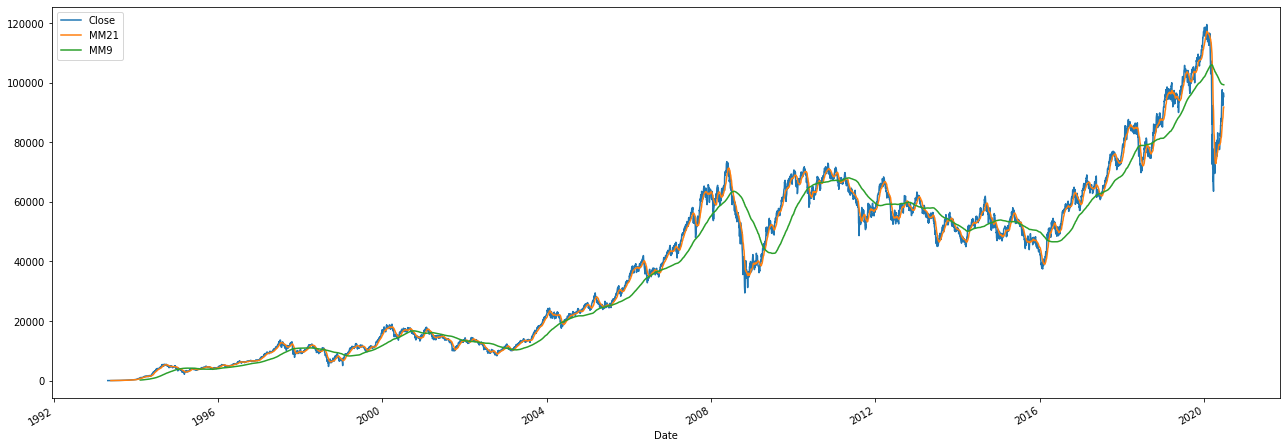

In [ ]:
ibov["Close"].plot(figsize=(22,8))
ibov["Close"].rolling(21).mean().plot(label="MM21")#janela movel,media,plot
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend() # mostra a legenda


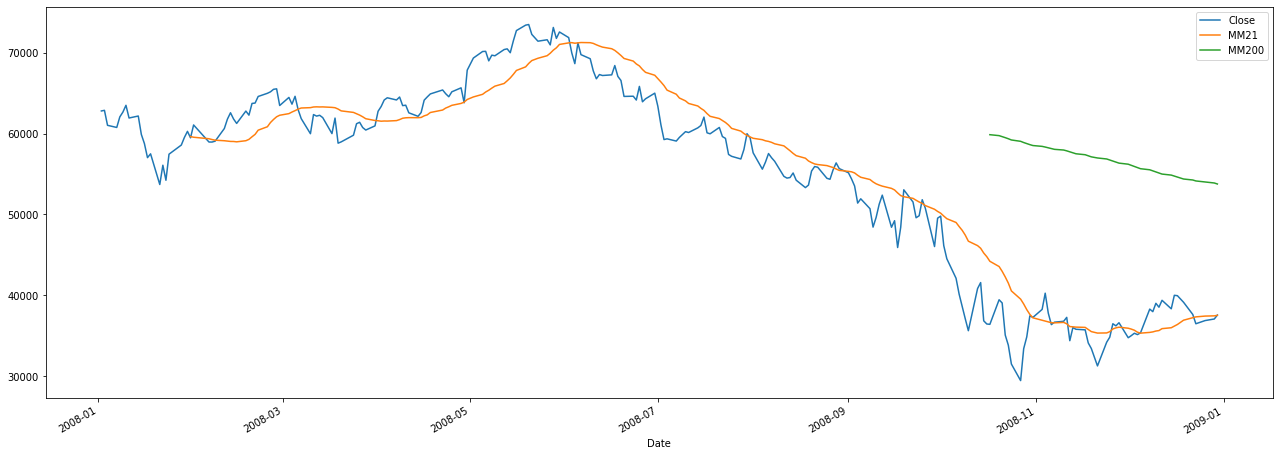

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2008] #filtro por index
ibov_fatiado["Close"].plot(figsize=(22,8))
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")#janela movel,media,plot
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend() # mostra a legenda

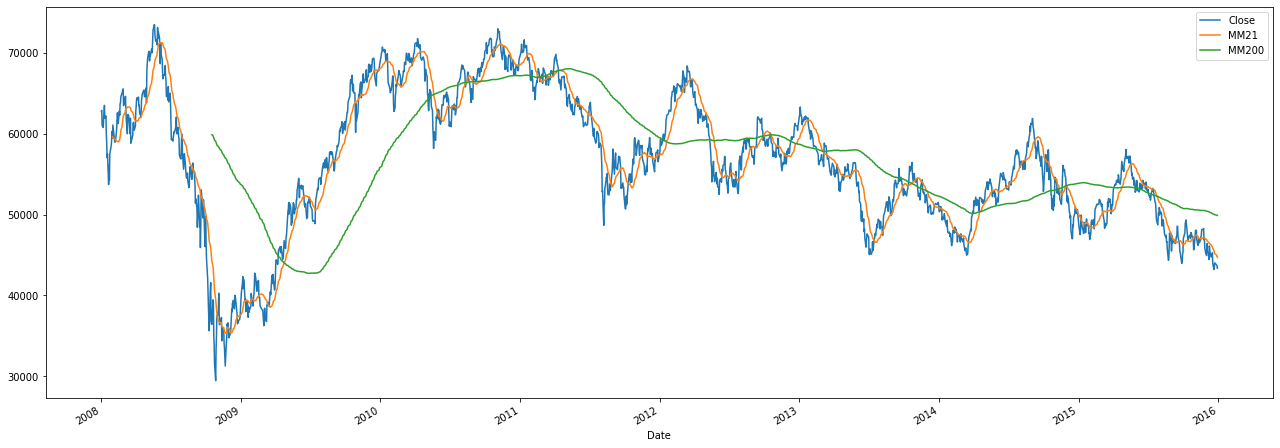

In [ ]:
ibov_fatiado = ibov[(ibov.index.year >= 2008)& (ibov.index.year <= 2015)] #filtro por index
ibov_fatiado["Close"].plot(figsize=(22,8))
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")#janela movel,media,plot
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend() # mostra a legenda

In [ ]:
ibov_fatiado = ibov[ibov.index.month == 12] #filtro por index
ibov_fatiado.tail(50)

Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2017-12-12   72800.0   73814.0   71798.0   73814.0    73814.0  2956100
2017-12-13   73827.0   74622.0   72569.0   72914.0    72914.0  4494700
2017-12-14   72913.0   72913.0   71969.0   72429.0    72429.0  3491800
2017-12-15   72428.0   73069.0   72277.0   72608.0    72608.0  4659500
2017-12-18   72621.0   73519.0   72621.0   73115.0    73115.0  3202900
2017-12-19   73122.0   73139.0   72347.0   72680.0    72680.0  2351600
2017-12-20   72680.0   73492.0   72680.0   73367.0    73367.0  2219600
2017-12-21   73367.0   75133.0   73265.0   75133.0    75133.0  3056400
2017-12-22   75128.0   75227.0   74623.0   75187.0    75187.0  1906900
2017-12-26   75187.0   75758.0   74924.0   75688.0    75688.0  1579700
2017-12-27   75708.0   76293.0   75708.0   76073.0    76073.0  1792200
2017-12-28   76077.0   76437.0   76077.0   76402.0    76402.0  2083000
2017-12-29   76077.0   76437.0   76077.0   76402.0    76402.0        0
2018-12-03   89511.0   91242.0   89429.0   89820.0    89820.0  5935600
2018-12-04   89820.0   90452.0   88041.0   88624.0    88624.0  4879700
2018-12-05   88644.0   89111.0   88449.0   89040.0    89040.0  2790000
2018-12-06   88933.0   88933.0   87025.0   88846.0    88846.0  4370100
2018-12-07   88849.0   89986.0   87907.0   88115.0    88115.0  4479100
2018-12-10   88115.0   88384.0   85915.0   85915.0    85915.0  4084400
2018-12-11   85918.0   87520.0   85583.0   86420.0    86420.0  4390100
2018-12-12   86420.0   87946.0   86420.0   86977.0    86977.0  5000500
2018-12-13   86979.0   87842.0   86856.0   87838.0    87838.0  3658600
2018-12-14   87838.0   88184.0   87106.0   87450.0    87450.0  3553300
2018-12-17   87448.0   87820.0   86328.0   86400.0    86400.0  3849300
2018-12-18   86400.0   87274.0   86400.0   86610.0    86610.0  4093500
2018-12-19   86617.0   88101.0   85674.0   85674.0    85674.0  5664200
2018-12-20   85678.0   86584.0   84756.0   85269.0    85269.0  6100500
2018-12-21   85269.0   86554.0   85134.0   85697.0    85697.0  6076200
2018-12-26   85684.0   85684.0   83892.0   85136.0    85136.0  3355100
2018-12-27   85141.0   85739.0   84876.0   85460.0    85460.0  3820900
2018-12-28   85469.0   88044.0   85469.0   87887.0    87887.0  3649100
2019-12-02  108246.0  109279.0  108245.0  109061.0   109061.0  4708000
2019-12-03  108931.0  109198.0  108190.0  109005.0   109005.0  5223100
2019-12-04  108962.0  110301.0  108962.0  110301.0   110301.0  4889500
2019-12-05  110297.0  111073.0  110008.0  110622.0   110622.0  4399100
2019-12-06  110623.0  111430.0  110623.0  111126.0   111126.0  4968100
2019-12-09  111125.0  111453.0  110870.0  110977.0   110977.0  4991500
2019-12-10  110973.0  111184.0  110133.0  110672.0   110672.0  4758800
2019-12-11  110672.0  111227.0  110530.0  110964.0   110964.0  5146100
2019-12-12  110963.0  112445.0  110963.0  112200.0   112200.0  5682000
2019-12-13  112205.0  112829.0  111780.0  112565.0   112565.0  7712100
2019-12-16  112565.0  113197.0  111896.0  111896.0   111896.0  6078300
2019-12-17  111897.0  112695.0  111897.0  112616.0   112616.0  5352500
2019-12-18  112618.0  114339.0  112300.0  114315.0   114315.0  7940900
2019-12-19  114313.0  115132.0  113712.0  115131.0   115131.0  5784600
2019-12-20  115133.0  115171.0  114526.0  115121.0   115121.0  6887400
2019-12-23  115119.0  115863.0  114964.0  115863.0   115863.0  3995200
2019-12-26  115864.0  117220.0  115673.0  117203.0   117203.0  3788900
2019-12-27  117205.0  117803.0  115995.0  116534.0   116534.0  3905900
2019-12-30  116530.0  117086.0  115790.0  115964.0   115964.0  3667900

#2.Correlacao Dolar e Ibov (aula 3)



In [ ]:
tickers = ["^BVSP","USDBRL=X"]
carteira = web.get_data_yahoo(tickers, start="2007-01-01")["Close"]


[*********************100%***********************]  2 of 2 completed


In [ ]:
carteira

USDBRL=X    ^BVSP
Date                         
2007-01-01    2.1325      NaN
2007-01-02    2.1310  45383.0
2007-01-03    2.1345  44445.0
2007-01-04    2.1390  44020.0
2007-01-05    2.1470  42245.0
...              ...      ...
2020-06-23    5.2519  95975.0
2020-06-24    5.1510  94377.0
2020-06-25    5.3466  95983.0
2020-06-26    5.3595  93834.0
2020-06-29    5.4840      NaN

[3518 rows x 2 columns]

In [ ]:
carteira = carteira.dropna() #tirando dados faltantes (dias sem negociação)
carteira

USDBRL=X    ^BVSP
Date                         
2007-01-02    2.1310  45383.0
2007-01-03    2.1345  44445.0
2007-01-04    2.1390  44020.0
2007-01-05    2.1470  42245.0
2007-01-08    2.1465  42830.0
...              ...      ...
2020-06-22    5.3100  95336.0
2020-06-23    5.2519  95975.0
2020-06-24    5.1510  94377.0
2020-06-25    5.3466  95983.0
2020-06-26    5.3595  93834.0

[3301 rows x 2 columns]

In [ ]:
carteira.columns = ["DOLAR","IBOV"] # Mudando nome das colunas
carteira

DOLAR     IBOV
Date                       
2007-01-02  2.1310  45383.0
2007-01-03  2.1345  44445.0
2007-01-04  2.1390  44020.0
2007-01-05  2.1470  42245.0
2007-01-08  2.1465  42830.0
...            ...      ...
2020-06-22  5.3100  95336.0
2020-06-23  5.2519  95975.0
2020-06-24  5.1510  94377.0
2020-06-25  5.3466  95983.0
2020-06-26  5.3595  93834.0

[3301 rows x 2 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5a9c4be80>,
      dtype=object)

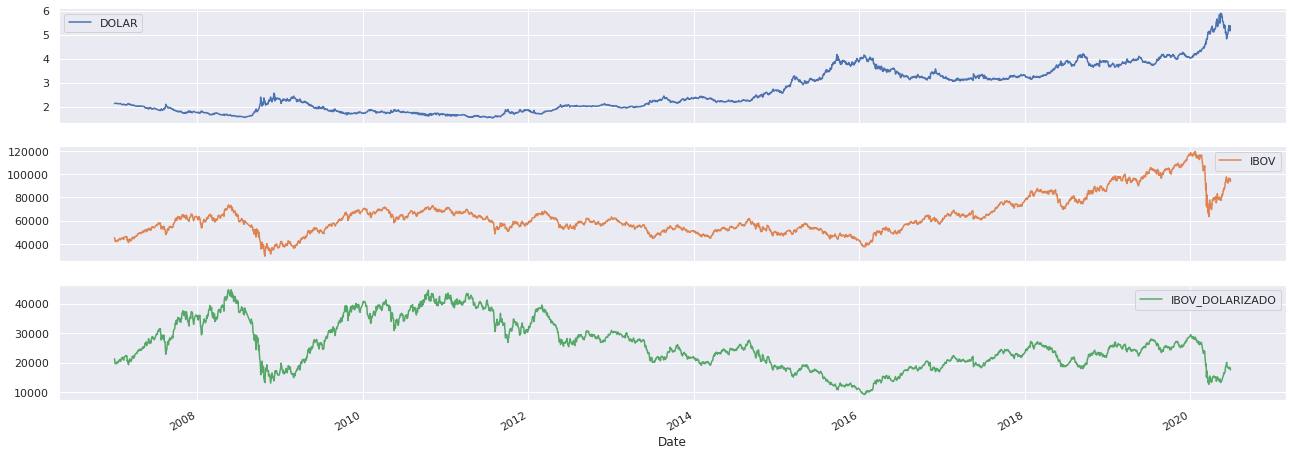

In [ ]:
sns.set() #embelezando o grafico com essa biblioteca
carteira.plot(subplots=True, figsize=(22,8))

In [ ]:
carteira.corr() #calculo de correlação

DOLAR      IBOV
DOLAR  1.000000  0.492893
IBOV   0.492893  1.000000

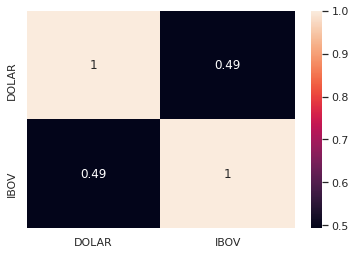

In [ ]:
sns.heatmap(carteira.corr(), annot= True)#embelezamento

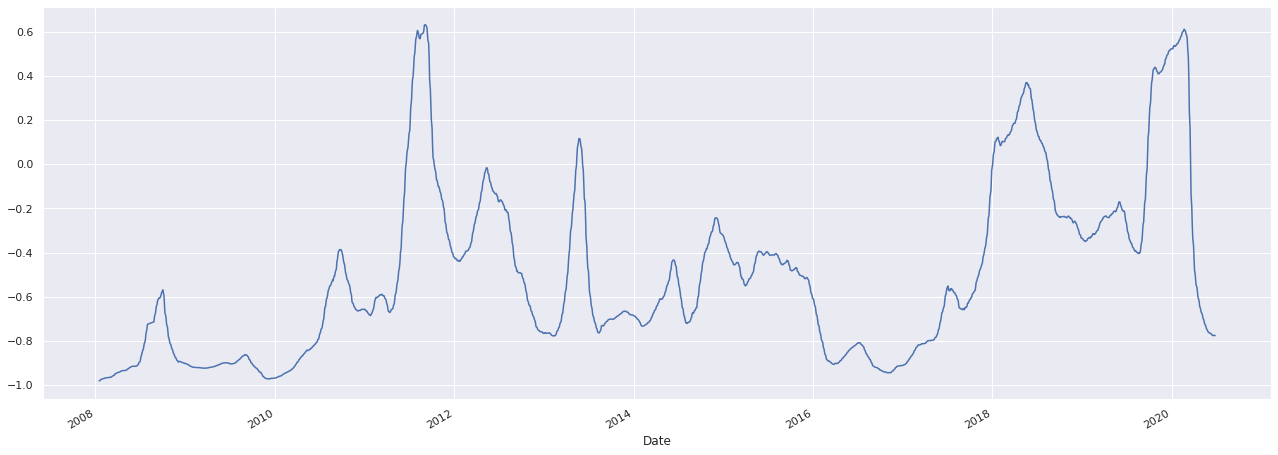

In [ ]:
carteira["DOLAR"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22,8))# caalcula a correlacao a cada 252 dias

In [ ]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DOLAR     IBOV  IBOV_DOLARIZADO
Date                                        
2007-01-02  2.1310  45383.0     21296.573959
2007-01-03  2.1345  44445.0     20822.206345
2007-01-04  2.1390  44020.0     20579.710732
2007-01-05  2.1470  42245.0     19676.291819
2007-01-08  2.1465  42830.0     19953.411504
...            ...      ...              ...
2020-06-22  5.3100  95336.0     17954.049158
2020-06-23  5.2519  95975.0     18274.338128
2020-06-24  5.1510  94377.0     18322.073302
2020-06-25  5.3466  95983.0     17952.156324
2020-06-26  5.3595  93834.0     17507.976715

[3301 rows x 3 columns]

#3.Simulando carteira de acoes (aula4)

In [ ]:
tickers = ["ABEV3.SA","ITSA4.SA","WEGE3.SA","USIM5.SA","VALE3.SA"]
carteira = web.get_data_yahoo(tickers, period="5y")["Adj Close"]
ibov = web.get_data_yahoo("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


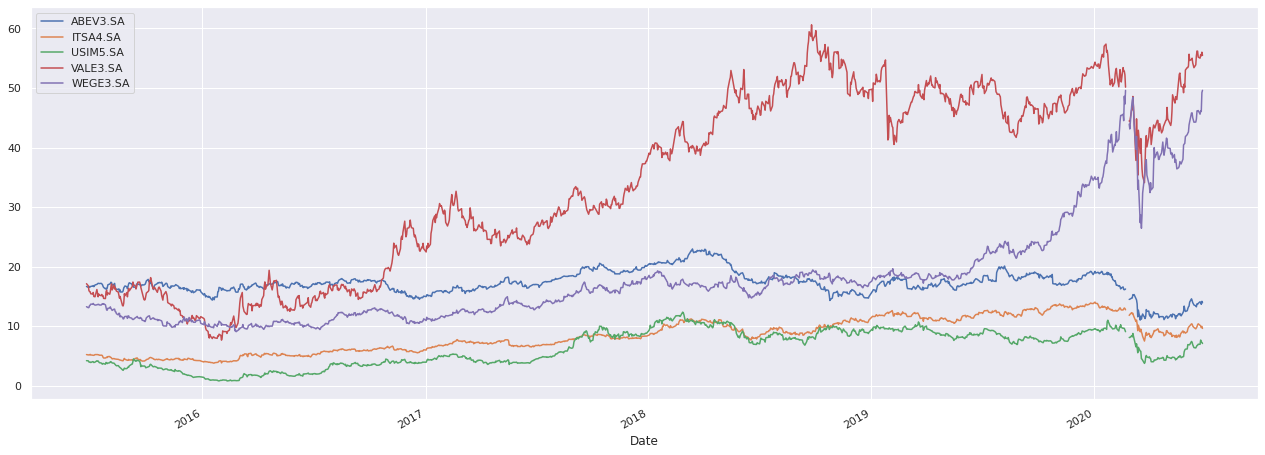

In [ ]:
sns.set()
carteira.plot(figsize=(22,8))

In [ ]:
carteira_normalizada = (carteira / carteira.iloc[0])#dividindo carteira pelo primeiro dado
carteira_normalizada = (carteira_normalizada*10000) # como se tivesse comprado 10000 de cada
carteira_normalizada

ABEV3.SA      ITSA4.SA  ...      VALE3.SA      WEGE3.SA
Date                                    ...                            
2015-06-26  10000.000000  10000.000000  ...  10000.000000  10000.000000
2015-06-29   9905.955686   9877.640984  ...   9785.931735   9869.866597
2015-06-30   9921.630501   9911.014848  ...   9322.118644   9895.919414
2015-07-01   9994.774681   9888.766514  ...   9230.376612  10140.557689
2015-07-02   9947.754811  10055.615834  ...   9209.989927  10187.388711
...                  ...           ...  ...           ...           ...
2020-06-22   8460.355448  19351.124667  ...  32086.193903  34332.408062
2020-06-23   8352.427841  19179.539860  ...  32430.391344  34723.918337
2020-06-24   8202.527847  18626.650636  ...  32313.713831  34671.215307
2020-06-25   8502.327835  18988.887652  ...  32669.579246  37057.921563
2020-06-26   8364.419543  18359.737907  ...  32354.550627  37344.022906

[1243 rows x 5 columns]

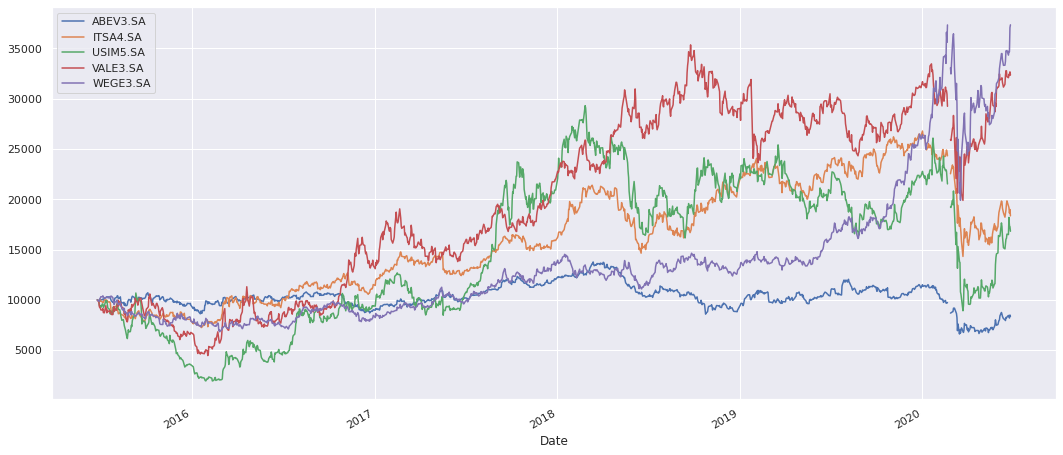

In [ ]:
carteira_normalizada.plot(figsize=(18,8))

In [ ]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1) # somando os tadas as acoes a carteira
carteira_normalizada

ABEV3.SA      ITSA4.SA  ...      WEGE3.SA          saldo
Date                                    ...                             
2015-06-26  10000.000000  10000.000000  ...  10000.000000   50000.000000
2015-06-29   9905.955686   9877.640984  ...   9869.866597   49370.429602
2015-06-30   9921.630501   9911.014848  ...   9895.919414   48521.948294
2015-07-01   9994.774681   9888.766514  ...  10140.557689   48656.775548
2015-07-02   9947.754811  10055.615834  ...  10187.388711   48849.026644
...                  ...           ...  ...           ...            ...
2020-06-22   8460.355448  19351.124667  ...  34332.408062  110725.743771
2020-06-23   8352.427841  19179.539860  ...  34723.918337  112888.386329
2020-06-24   8202.527847  18626.650636  ...  34671.215307  111186.693580
2020-06-25   8502.327835  18988.887652  ...  37057.921563  114496.499693
2020-06-26   8364.419543  18359.737907  ...  37344.022906  113250.201643

[1243 rows x 6 columns]

In [ ]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000 #normalizando ibov
ibov_normalizado

Date
2015-06-26    50000.000000
2015-06-29    49071.588574
2015-06-30    49133.606087
2015-07-01    48834.626136
2015-07-02    49156.746950
                  ...     
2020-06-22    88246.292834
2020-06-23    88837.773294
2020-06-24    87358.609327
2020-06-25    88845.178370
2020-06-26    86855.989781
Name: Adj Close, Length: 1236, dtype: float64

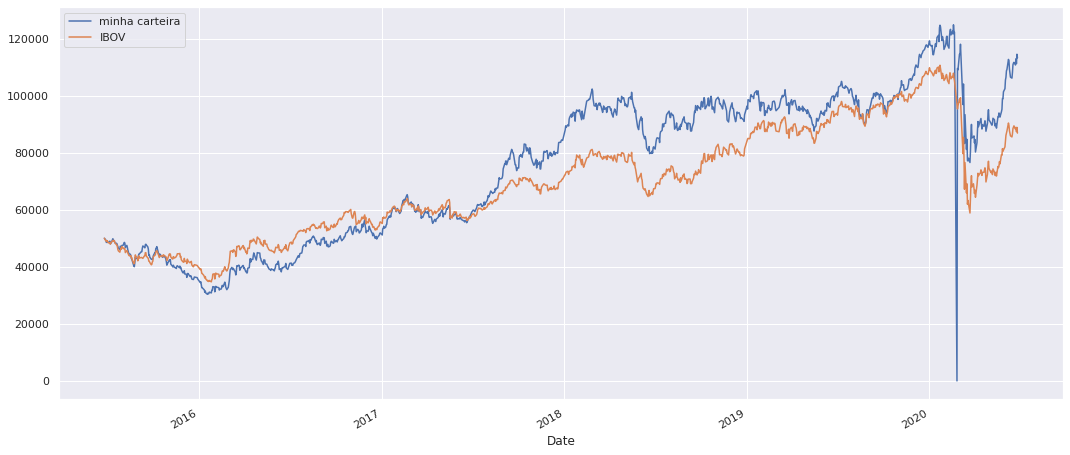

In [ ]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label= "minha carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend()

#4.Backtesting Pyfolio (aula 5)

In [ ]:
tickers = ["ABEV3.SA","ITSA4.SA","WEGE3.SA","USIM5.SA","VALE3.SA","^BVSP"]
dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]
#ibov = web.get_data_yahoo("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  6 of 6 completed


In [ ]:
dados_yahoo

ABEV3.SA  ITSA4.SA  USIM5.SA   VALE3.SA   WEGE3.SA
Date                                                           
2015-06-29  16.520941  5.180994  4.190193  16.774387  13.098962
2015-06-30  16.547083  5.198499  3.996202  15.979350  13.133537
2015-07-01  16.669071  5.186829  3.967104  15.822092  13.458216
2015-07-02  16.590652  5.274344  3.986503  15.787147  13.520367
2015-07-03  16.686501  5.186829  3.908907  15.446415  13.699992
...               ...       ...       ...        ...        ...
2020-06-24  13.680000  9.770000  7.330000  55.389999  46.014500
2020-06-25  14.180000  9.960000  7.290000  56.000000  49.182060
2020-06-26  13.950000  9.630000  7.100000  55.459999  49.561764
2020-06-29  14.340000  9.850000  7.090000  55.080002        NaN
2020-06-29  14.340000  9.850000  7.090000  55.080002  49.630001

[1244 rows x 5 columns]

In [ ]:
retorno = dados_yahoo.pct_change() # retorno diario de todos
retorno

ABEV3.SA  ITSA4.SA  USIM5.SA  VALE3.SA  WEGE3.SA     ^BVSP
Date                                                                  
2015-06-29       NaN       NaN       NaN       NaN       NaN       NaN
2015-06-30  0.001582  0.003379 -0.046296 -0.047396  0.002640  0.001264
2015-07-01  0.007372 -0.002245 -0.007281 -0.009841  0.024721 -0.006085
2015-07-02 -0.004704  0.016873  0.004890 -0.002209  0.004618  0.006596
2015-07-03  0.005777 -0.016593 -0.019465 -0.021583  0.013286 -0.011053
...              ...       ...       ...       ...       ...       ...
2020-06-24 -0.017947 -0.028827 -0.045573 -0.003598 -0.001518 -0.016650
2020-06-25  0.036550  0.019447 -0.005457  0.011013  0.068838  0.017017
2020-06-26 -0.016220 -0.033133 -0.026063 -0.009643  0.007720 -0.022389
2020-06-29  0.027240  0.025961  0.007042 -0.004868  0.000000  0.015039
2020-06-29  0.000000  0.000000  0.000000  0.000000  0.003798  0.000000

[1244 rows x 6 columns]

In [ ]:
retorno_acumulado = (1 + retorno).cumprod()#fazendo produtorio
retorno_acumulado

ABEV3.SA  ITSA4.SA  USIM5.SA  VALE3.SA  WEGE3.SA     ^BVSP
Date                                                                  
2015-06-29       NaN       NaN       NaN       NaN       NaN       NaN
2015-06-30  1.001582  1.003379  0.953704  0.952604  1.002640  1.001264
2015-07-01  1.008966  1.001126  0.946759  0.943229  1.027426  0.995171
2015-07-02  1.004220  1.018018  0.951389  0.941146  1.032171  1.001735
2015-07-03  1.010021  1.001126  0.932870  0.920833  1.045884  0.990663
...              ...       ...       ...       ...       ...       ...
2020-06-24  0.828040  1.885739  1.749323  3.302058  3.512836  1.780228
2020-06-25  0.858305  1.922411  1.739777  3.338423  3.754653  1.810522
2020-06-26  0.844383  1.858717  1.694433  3.306231  3.783641  1.769985
2020-06-29  0.867384  1.906970  1.706365  3.290135  3.783641  1.796603
2020-06-29  0.867384  1.906970  1.706365  3.290135  3.798011  1.796603

[1244 rows x 6 columns]

In [ ]:
retorno_acumulado.iloc[0] = 1# so para ajustar primeira linha da tabela, tirar o NaN
retorno_acumulado

ABEV3.SA  ITSA4.SA  USIM5.SA  VALE3.SA  WEGE3.SA     ^BVSP
Date                                                                  
2015-06-29  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
2015-06-30  1.001582  1.003379  0.953704  0.952604  1.002640  1.001264
2015-07-01  1.008966  1.001126  0.946759  0.943229  1.027426  0.995171
2015-07-02  1.004220  1.018018  0.951389  0.941146  1.032171  1.001735
2015-07-03  1.010021  1.001126  0.932870  0.920833  1.045884  0.990663
...              ...       ...       ...       ...       ...       ...
2020-06-24  0.828040  1.885739  1.749323  3.302058  3.512836  1.780228
2020-06-25  0.858305  1.922411  1.739777  3.338423  3.754653  1.810522
2020-06-26  0.844383  1.858717  1.694433  3.306231  3.783641  1.769985
2020-06-29  0.867384  1.906970  1.706365  3.290135  3.783641  1.796603
2020-06-29  0.867384  1.906970  1.706365  3.290135  3.798011  1.796603

[1244 rows x 6 columns]

In [ ]:
carteira = 10000 * retorno_acumulado.iloc[:,:5] # seria o retorno acumulado se fosse investido R$10.000, tirando o ibov
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change() 
carteira

ABEV3.SA      ITSA4.SA  ...          saldo   retorno
Date                                    ...                         
2015-06-29  10000.000000  10000.000000  ...   50000.000000       NaN
2015-06-30  10015.823627  10033.787282  ...   49139.084881 -0.017218
2015-07-01  10089.662216  10011.263348  ...   49275.072647  0.002767
2015-07-02  10042.195954  10180.179509  ...   49469.433733  0.003944
2015-07-03  10100.212071  10011.263348  ...   49107.351331 -0.007319
...                  ...           ...  ...            ...       ...
2020-06-24   8280.400303  18857.387778  ...  112779.952614 -0.015013
2020-06-25   8583.046507  19224.111994  ...  116135.688943  0.029755
2020-06-26   8443.828953  18587.168674  ...  114874.041252 -0.010864
2020-06-29   8673.840137  19069.701604  ...  115544.952124  0.005840
2020-06-29   8673.840137  19069.701604  ...  115688.655296  0.001244

[1244 rows x 7 columns]

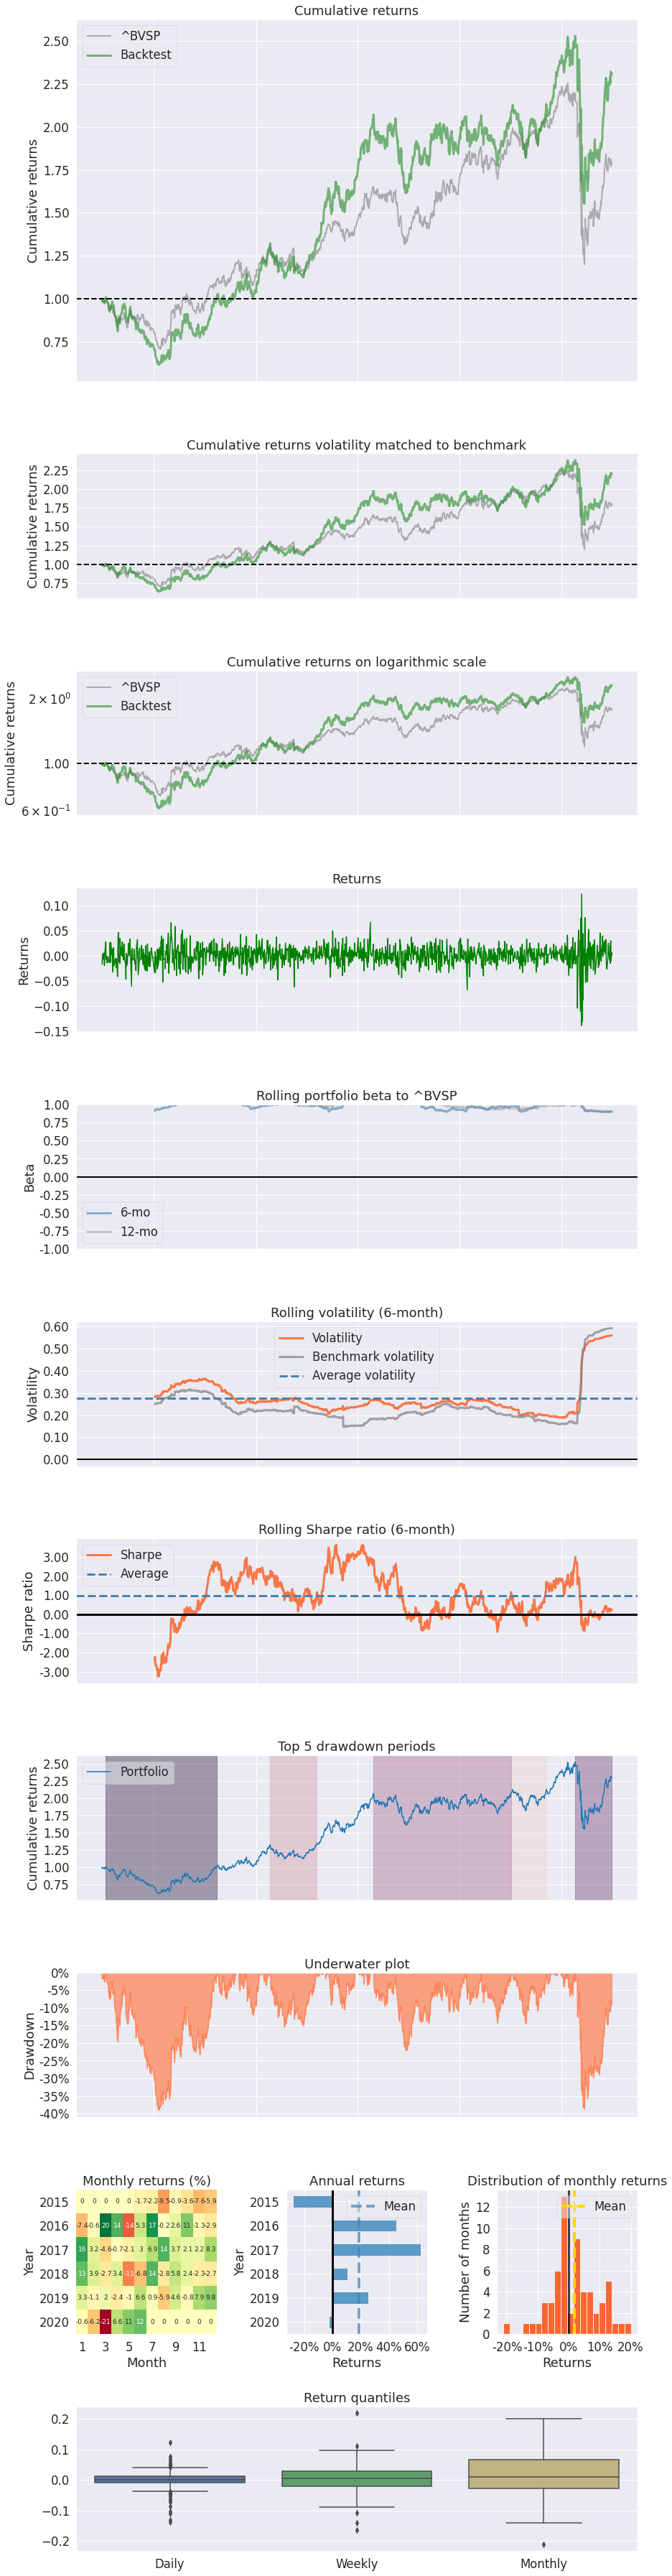

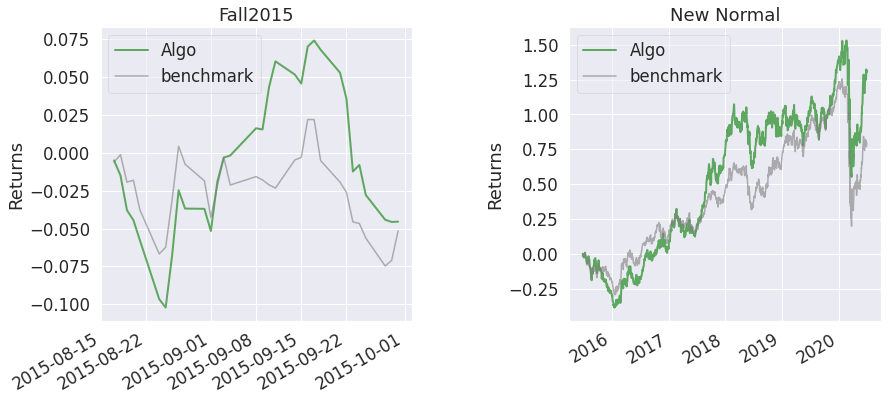

In [ ]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

(0.8, 1.4)

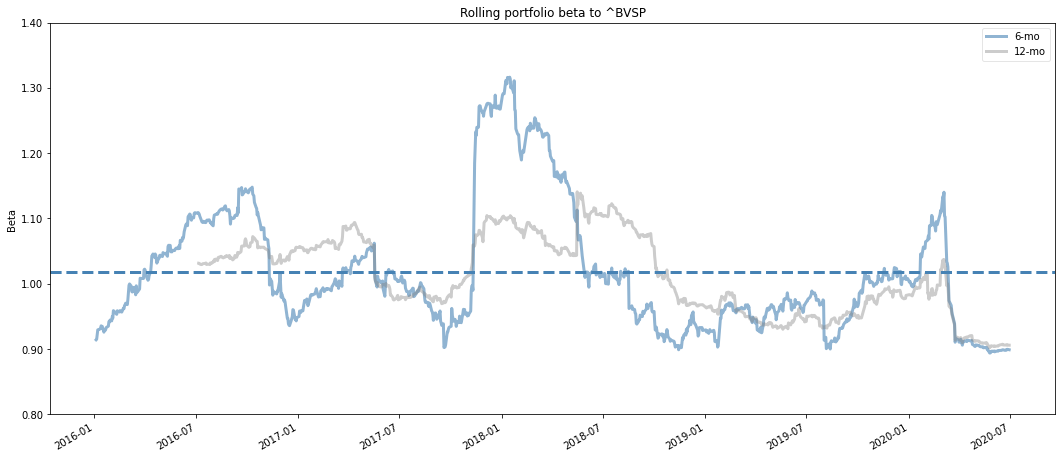

In [ ]:
#ajustando grafico do beta
fig, ax1 = plt.subplots(figsize=(18,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4))

#5.Simulando carteiras aleatoria(aula 6)

In [ ]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]


[*********************100%***********************]  73 of 73 completed


In [ ]:

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]#normalizando ibov

[*********************100%***********************]  1 of 1 completed


In [ ]:
dados_yahoo

ABEV3.SA   AZUL4.SA   B3SA3.SA  ...  VVAR3.SA   WEGE3.SA   YDUQ3.SA
Date                                         ...                                
2019-07-01  17.354204  42.090000  37.159817  ...      5.12  21.328831  27.825476
2019-07-02  17.666014  42.410000  36.575382  ...      5.45  21.309061  28.326040
2019-07-03  18.357845  44.060001  37.403324  ...      5.99  21.447433  28.473265
2019-07-04  18.513750  46.750000  38.708546  ...      6.24  21.941612  29.376244
2019-07-05  18.513750  48.450001  39.453876  ...      6.35  22.139286  29.680506
...               ...        ...        ...  ...       ...        ...        ...
2020-06-23  13.930000  22.500000  52.279999  ...     15.03  46.084446  37.049999
2020-06-24  13.680000  21.100000  52.650002  ...     14.58  46.014500  35.130001
2020-06-25  14.180000  21.200001  55.000000  ...     14.55  49.182060  34.750000
2020-06-26  13.950000  20.000000  53.450001  ...     14.12  49.561764  33.090000
2020-06-29  14.310000  20.580000  54.619999  ...     15.28  50.000000  34.150002

[248 rows x 73 columns]

In [ ]:
dados_yahoo.dropna(how='all', inplace=True)# tirar linha com todos os dados vazios
dados_yahoo.dropna(axis=1, inplace=True, thresh=247)# tirando empresas q mudam o cod, exis=1 = eixos das colunas
dados_yahoo


ABEV3.SA   AZUL4.SA   B3SA3.SA  ...   VIVT4.SA  VVAR3.SA   WEGE3.SA
Date                                         ...                                
2019-07-01  17.354204  42.090000  37.159817  ...  45.743633      5.12  21.328831
2019-07-02  17.666014  42.410000  36.575382  ...  46.763073      5.45  21.309061
2019-07-03  18.357845  44.060001  37.403324  ...  47.352280      5.99  21.447433
2019-07-04  18.513750  46.750000  38.708546  ...  47.857323      6.24  21.941612
2019-07-05  18.513750  48.450001  39.453876  ...  47.417751      6.35  22.139286
...               ...        ...        ...  ...        ...       ...        ...
2020-06-23  13.930000  22.500000  52.279999  ...  49.220001     15.03  46.084446
2020-06-24  13.680000  21.100000  52.650002  ...  48.820000     14.58  46.014500
2020-06-25  14.180000  21.200001  55.000000  ...  49.310001     14.55  49.182060
2020-06-26  13.950000  20.000000  53.450001  ...  48.540001     14.12  49.561764
2020-06-29  14.310000  20.580000  54.619999  ...  48.259998     15.28  50.000000

[247 rows x 70 columns]

In [ ]:
retorno = dados_yahoo.pct_change() #variacao de cada ativo percentual
retorno


ABEV3.SA  AZUL4.SA  B3SA3.SA  ...  VIVT4.SA  VVAR3.SA  WEGE3.SA
Date                                      ...                              
2019-07-01       NaN       NaN       NaN  ...       NaN       NaN       NaN
2019-07-02  0.017967  0.007603 -0.015728  ...  0.022286  0.064453 -0.000927
2019-07-03  0.039162  0.038906  0.022637  ...  0.012600  0.099083  0.006494
2019-07-04  0.008493  0.061053  0.034896  ...  0.010666  0.041736  0.023041
2019-07-05  0.000000  0.036364  0.019255  ... -0.009185  0.017628  0.009009
...              ...       ...       ...  ...       ...       ...       ...
2020-06-23 -0.012757  0.090645  0.038744  ... -0.009658  0.008725  0.011404
2020-06-24 -0.017947 -0.062222  0.007077  ... -0.008127 -0.029940 -0.001518
2020-06-25  0.036550  0.004739  0.044634  ...  0.010037 -0.002058  0.068838
2020-06-26 -0.016220 -0.056604 -0.028182  ... -0.015616 -0.029553  0.007720
2020-06-29  0.025806  0.029000  0.021890  ... -0.005768  0.082153  0.008842

[247 rows x 70 columns]

In [ ]:
retorno_acumulado = (1 + retorno).cumprod()#fazendo produtorio
retorno_acumulado.iloc[0] = 1
retorno_acumulado

ABEV3.SA  AZUL4.SA  B3SA3.SA  ...  VIVT4.SA  VVAR3.SA  WEGE3.SA
Date                                      ...                              
2019-07-01  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000
2019-07-02  1.017967  1.007603  0.984272  ...  1.022286  1.064453  0.999073
2019-07-03  1.057833  1.046804  1.006553  ...  1.035167  1.169922  1.005561
2019-07-04  1.066816  1.110715  1.041678  ...  1.046207  1.218750  1.028730
2019-07-05  1.066816  1.151105  1.061735  ...  1.036598  1.240234  1.037998
...              ...       ...       ...  ...       ...       ...       ...
2020-06-23  0.802687  0.534569  1.406896  ...  1.075997  2.935547  2.160664
2020-06-24  0.788282  0.501307  1.416853  ...  1.067252  2.847656  2.157385
2020-06-25  0.817093  0.503683  1.480093  ...  1.077964  2.841797  2.305896
2020-06-26  0.803840  0.475172  1.438382  ...  1.061131  2.757813  2.323698
2020-06-29  0.824584  0.488952  1.469867  ...  1.055010  2.984375  2.344245

[247 rows x 70 columns]

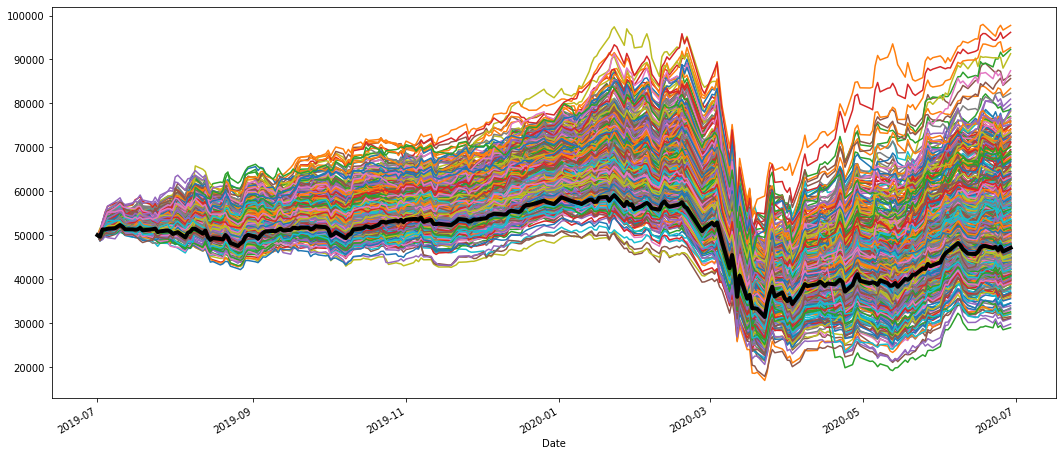

In [ ]:
#carteira = random.choices(dados_yahoo.columns, k=5)# pega de 5 em 5 e pode selecionar o mesmo ativo mais de uma vez
for i in range(500):
  carteira = random.sample(list(dados_yahoo.columns),k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira] #para so pegar retorno acumulado dos ativos da carteira
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))
  #carteira['retorno'] = carteira['saldo'].pct_change()
  carteira
(ibov*50000).plot(linewidth=4,color='black',figsize=(18,8))

#6.analise estatistica(aula 7)

In [ ]:
ibov = yf.download("^BVSP")[["Adj Close"]]


[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov

Adj Close
Date                    
1993-04-27     24.500000
1993-04-28     24.299999
1993-04-29     23.700001
1993-04-30     24.100000
1993-05-03     24.100000
...                  ...
2020-06-24  94377.000000
2020-06-25  95983.000000
2020-06-26  93834.000000
2020-06-29  95735.000000
2020-06-30  95094.382812

[6723 rows x 1 columns]

In [ ]:
ibov['retorno'] = ibov["Adj Close"].pct_change()
ibov.dropna(inplace=True)

In [ ]:
media_ibov = ibov['retorno'].mean()
print('retorno medio= {:.2f}%'.format(media_ibov*100))

retorno medio= 0.15%


In [ ]:
desvio_padrao_ibov = ibov['retorno'].std()
print('retorno medio= {:.2f}%'.format(desvio_padrao_ibov*100))

retorno medio= 2.27%


In [ ]:
ibov[ibov["retorno"]<-0.12]

Adj Close   retorno
Date                           
1997-10-27     9817.0 -0.149675
1998-09-10     4761.0 -0.158090
2020-03-09    86067.0 -0.121738
2020-03-12    72583.0 -0.147797
2020-03-16    71168.0 -0.139215

**Qual probabilidade do ibov cair mais de 12% considerando que os retornos seguem uma distribuicao normal ?**

In [ ]:
probabilidade_teorica = norm.cdf(-0.12, loc=media_ibov, scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000463%


In [ ]:
frequencia_teorica = 1 /probabilidade_teorica
print('uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'. format(int(round(frequencia_teorica/252,5))))

uma vez a cada 21584884 dias
Ou uma vez a cada 85654 anos


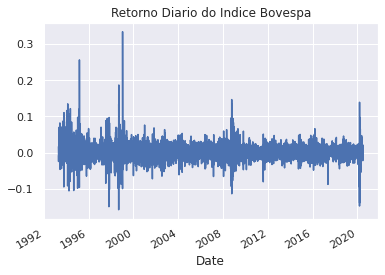

In [ ]:
ibov['retorno'].plot(title="Retorno Diario do Indice Bovespa");

In [ ]:
ibov['retorno_teorico'] = norm.rvs(size=ibov['retorno'].size, loc=media_ibov, scale=desvio_padrao_ibov)

(-0.2, 0.4)

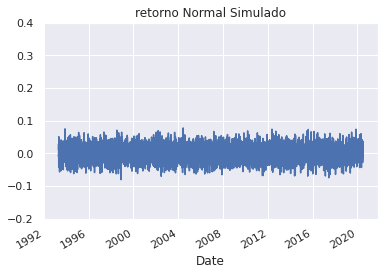

In [ ]:
ax=  ibov['retorno_teorico'].plot(title="retorno Normal Simulado")
ax.set_ylim(-0.2,0.4)

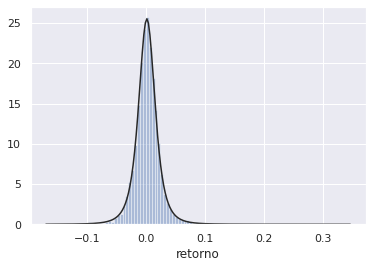

In [ ]:
#sns.distplot(ibov['retorno'], bins=100,kde=False);
#sns.distplot(ibov['retorno'], bins=100,kde=False, fit= norm);
sns.distplot(ibov['retorno'], bins=100,kde=False, fit=t);



In [ ]:
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Distribuição T-Student\nGraus de liberdade={:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade=3.25 
Média=0.0012 
Desvio padrão=0.01449


In [ ]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.13192129%


In [ ]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 758 dias
Ou uma vez a cada 3 anos


In [ ]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 21584884 dias
Ou uma vez a cada 85654 anos


In [ ]:
frequencia_observada = ibov['retorno'].size / ibov[ibov["retorno"] < -0.12].size 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 448 dias


#7.Classificando empresas da bolsa-magic formula(aula 8)

In [ ]:
url ='http://www.fundamentus.com.br/resultado.php'
df = ps.read_html(url)

In [ ]:
df

[     Papel  Cotação      P/L  ...       Patrim. Líq  Dív.Brut/ Patrim. Cresc. Rec.5a
 0    VNET3      0.0  0.00000  ...   9.257.250.00000                0.0        -2,71%
 1    CFLU4      1.0  0.00000  ...      60.351.00000                6.0         8,14%
 2    CLAN3      0.0  0.00000  ...   1.012.240.00000                0.0       -63,96%
 3    CLSC6      0.0  0.00000  ...   1.551.160.00000                0.0         6,66%
 4    CSTB3  15000.0  0.00000  ...   8.420.670.00000               14.0        31,91%
 ..     ...      ...      ...  ...               ...                ...           ...
 882  CEPE6   2000.0  1.54585  ...   1.667.000.00000              336.0         8,63%
 883  CEPE3   2453.0  1.89599  ...   1.667.000.00000              336.0         8,63%
 884  BRAP3   3320.0  2.04871  ...  10.522.400.00000                0.0         0,00%
 885  CEPE5   2700.0  2.08690  ...   1.667.000.00000              336.0         8,63%
 886  BRAP4   3653.0  2.25420  ...  10.522.400.00000  

In [ ]:
type(df)

list

In [ ]:
df[0]

Papel  Cotação      P/L  ...       Patrim. Líq  Dív.Brut/ Patrim. Cresc. Rec.5a
0    VNET3      0.0  0.00000  ...   9.257.250.00000                0.0        -2,71%
1    CFLU4      1.0  0.00000  ...      60.351.00000                6.0         8,14%
2    CLAN3      0.0  0.00000  ...   1.012.240.00000                0.0       -63,96%
3    CLSC6      0.0  0.00000  ...   1.551.160.00000                0.0         6,66%
4    CSTB3  15000.0  0.00000  ...   8.420.670.00000               14.0        31,91%
..     ...      ...      ...  ...               ...                ...           ...
882  CEPE6   2000.0  1.54585  ...   1.667.000.00000              336.0         8,63%
883  CEPE3   2453.0  1.89599  ...   1.667.000.00000              336.0         8,63%
884  BRAP3   3320.0  2.04871  ...  10.522.400.00000                0.0         0,00%
885  CEPE5   2700.0  2.08690  ...   1.667.000.00000              336.0         8,63%
886  BRAP4   3653.0  2.25420  ...  10.522.400.00000                0.0         0,00%

[887 rows x 21 columns]

In [ ]:
df = ps.read_html(url, decimal=',',thousands='.')[0]#ajuste para pegar so 1 tabela, trocando ,por .
df

Papel  Cotação      P/L  ...   Patrim. Líq  Dív.Brut/ Patrim. Cresc. Rec.5a
0    VNET3     0.00     0.00  ...  9.257250e+09               0.00        -2,71%
1    CFLU4  1000.00     0.00  ...  6.035100e+07               0.06         8,14%
2    CLAN3     0.00     0.00  ...  1.012240e+09               0.00       -63,96%
3    CLSC6     0.00     0.00  ...  1.551160e+09               0.00         6,66%
4    CSTB3   150.00     0.00  ...  8.420670e+09               0.14        31,91%
..     ...      ...      ...  ...           ...                ...           ...
882  CEPE6    20.00  1545.85  ...  1.667000e+09               3.36         8,63%
883  CEPE3    24.53  1895.99  ...  1.667000e+09               3.36         8,63%
884  BRAP3    32.49  2004.90  ...  1.052240e+10               0.00         0,00%
885  CEPE5    27.00  2086.90  ...  1.667000e+09               3.36         8,63%
886  BRAP4    36.34  2242.47  ...  1.052240e+10               0.00         0,00%

[887 rows x 21 columns]

In [ ]:
for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC','ROE', 'Cresc. Rec.5a']:
  df[coluna] = df[coluna].str.replace('.','')
  df[coluna] = df[coluna].str.replace(',','.')
  df[coluna] = df[coluna].str.rstrip('%').astype('float')/100
  

In [ ]:
df

Papel  Cotação      P/L  ...   Patrim. Líq  Dív.Brut/ Patrim.  Cresc. Rec.5a
13   OMGE3    35.34 -9824.35  ...  2.762890e+09               1.62         0.7027
17   SQIA3    18.72  -730.46  ...  4.232550e+08               0.19         0.2446
22   TUPY3    19.39  -309.69  ...  2.403220e+09               0.99         0.1213
24   COGN3     6.55  -291.85  ...  1.829470e+10               0.66         0.0753
27   BKBR3    10.33  -232.15  ...  1.735260e+09               0.40         0.2328
..     ...      ...      ...  ...           ...                ...            ...
874  STBP3     5.55   331.67  ...  1.339860e+09               0.33         0.0324
875  LINX3    24.00   359.58  ...  1.745060e+09               0.18         0.1578
877  LWSA3    42.63   371.23  ...  6.344790e+08               0.31         0.0000
878  VALE3    55.63   400.02  ...  1.788540e+11               0.55         0.1438
886  BRAP4    36.34  2242.47  ...  1.052240e+10               0.00         0.0000

[205 rows x 21 columns]

In [ ]:
df = df[df['Liq.2meses'] > 1000000] # tirando empresas q negociam menos de 1milhao do data frame
df

Papel  Cotação      P/L  ...   Patrim. Líq  Dív.Brut/ Patrim.  Cresc. Rec.5a
13   OMGE3    35.34 -9824.35  ...  2.762890e+09               1.62         0.7027
17   SQIA3    18.72  -730.46  ...  4.232550e+08               0.19         0.2446
22   TUPY3    19.39  -309.69  ...  2.403220e+09               0.99         0.1213
24   COGN3     6.55  -291.85  ...  1.829470e+10               0.66         0.0753
27   BKBR3    10.33  -232.15  ...  1.735260e+09               0.40         0.2328
..     ...      ...      ...  ...           ...                ...            ...
874  STBP3     5.55   331.67  ...  1.339860e+09               0.33         0.0324
875  LINX3    24.00   359.58  ...  1.745060e+09               0.18         0.1578
877  LWSA3    42.63   371.23  ...  6.344790e+08               0.31         0.0000
878  VALE3    55.63   400.02  ...  1.788540e+11               0.55         0.1438
886  BRAP4    36.34  2242.47  ...  1.052240e+10               0.00         0.0000

[205 rows x 21 columns]

In [ ]:
#formula magica de joel greenblatt
ranking = ps.DataFrame()
ranking['pos'] = range(1,151)
ranking['EV/EBIT'] = df[df['EV/EBIT'] > 0].sort_values(by=['EV/EBIT'])['Papel'][:150].values #VALOR DA FIRMA(VALOR DE MERCADO+DIVIDA LIQUIDA)/LUCRO ANTES DE....
ranking['ROIC'] = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:150].values 


In [ ]:
ranking

pos EV/EBIT   ROIC
0      1   PSSA3  WIZS3
1      2   SMLS3  PSSA3
2      3   ENAT3  TOTS3
3      4   WIZS3  ODPV3
4      5  SULA11  SMLS3
..   ...     ...    ...
145  146   SUZB3  JHSF3
146  147   PTBL3  BRKM5
147  148   RADL3  LOGG3
148  149   PNVL3  GFSA3
149  150   GNDI3  BRPR3

[150 rows x 3 columns]

In [ ]:
a = ranking.pivot_table(columns='EV/EBIT',values='pos')

In [ ]:
b = ranking.pivot_table(columns='ROIC',values='pos')

In [ ]:
t = ps.concat([a,b])
t

AALR3  ABEV3  AGRO3  ALPA4  ALSO3  ...  EZTC3  HAPV3  LWSA3  MGLU3  WEGE3
pos  112.0   89.0   69.0  143.0   76.0  ...    NaN    NaN    NaN    NaN    NaN
pos  141.0   15.0   83.0   20.0  131.0  ...  118.0   71.0  100.0  108.0   11.0

[2 rows x 154 columns]

In [ ]:
rank = t.dropna(axis=1).sum()
rank

AALR3     253.0
ABEV3     104.0
AGRO3     152.0
ALPA4     163.0
ALSO3     207.0
          ...  
VULC3     108.0
VVAR3     251.0
WIZS3       5.0
WSON33     45.0
YDUQ3      99.0
Length: 144, dtype: float64

In [ ]:
rank.sort_values()[:15]

PSSA3      3.0
WIZS3      5.0
SMLS3      7.0
SAPR11    22.0
SAPR4     22.0
VALE3     24.0
SAPR3     26.0
LEVE3     32.0
EQTL3     33.0
MRFG3     35.0
BEEF3     36.0
ALUP11    37.0
TGMA3     42.0
WSON33    45.0
CVCB3     47.0
dtype: float64

#8.Usando alpha Vantage(aula 9)

In [ ]:
alpha_vantage_api_key = 'FR5QYI3ACTZB0IBU'

In [ ]:
ts = TimeSeries(key=alpha_vantage_api_key, output_format='pandas')
ts.get_symbol_search('itau')

(                                      1. symbol  ... 9. matchScore
 date                                             ...              
 1970-01-01 00:00:00.000000000              ITUB  ...        0.7500
 1970-01-01 00:00:00.000000001              ITCB  ...        0.5455
 1970-01-01 00:00:00.000000002         ITUB4.SAO  ...        0.5333
 1970-01-01 00:00:00.000000003         ITSA4.SAO  ...        0.5000
 1970-01-01 00:00:00.000000004         ITUB3.SAO  ...        0.5000
 1970-01-01 00:00:00.000000005         ITSA3.SAO  ...        0.5000
 1970-01-01 00:00:00.000000006      ITAUCORP.SAN  ...        0.5000
 1970-01-01 00:00:00.000000007    0P0000UBY2.SAO  ...        0.5000
 1970-01-01 00:00:00.000000008          ITUB.ARG  ...        0.4211
 1970-01-01 00:00:00.000000009  ITAITAUPREVP.SAO  ...        0.1176
 
 [10 rows x 9 columns], None)

In [ ]:
#dados, meta_dados = ts.get_daily(symbol='^BVSP',outputsize='full')
dados, meta_dados = ts.get_daily(symbol='ITUB4.SAO', outputsize='full')
dados

1. open  2. high   3. low  4. close   5. volume
date                                                       
2020-06-30  26.2200  26.3100  25.8400   26.0400  11230000.0
2020-06-29  25.9000  26.5200  25.7500   26.4800  30767300.0
2020-06-26  25.7100  26.2200  25.5400   25.7100  39663400.0
2020-06-25  26.0300  26.3300  25.5100   26.1500  46375100.0
2020-06-24  26.7900  26.9200  25.6000   25.8400  57364300.0
...             ...      ...      ...       ...         ...
2000-12-28   2.9109   3.1294   2.8644    3.0632     77449.0
2000-12-27   2.8811   2.9274   2.8314    2.9274     27008.0
2000-12-26   2.8167   2.8347   2.7900    2.8314      7839.0
2000-12-22   2.9307   2.9307   2.8148    2.8322     23336.0
2000-12-21   2.8155   2.9885   2.8152    2.9606     74224.0

[4812 rows x 5 columns]

In [ ]:
meta_dados

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'ITUB4.SAO',
 '3. Last Refreshed': '2020-06-30',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

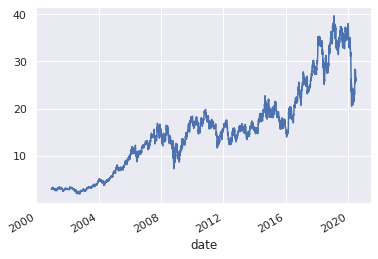

In [ ]:
dados['4. close'].plot() 

#9.Base de dados Banco Central(aula 10)

In [ ]:
#retirado do site, la tem o cod -- https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
#codigo_bcb = 433
def consulta_bc(codigo_bcb): #crindo como uma função
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = ps.read_json(url)
  df['data'] = ps.to_datetime(df['data'], dayfirst=True)# transformata formato da coluna data
  df.set_index('data',inplace=True) #setando data como index
  return df

In [ ]:
ipca = consulta_bc(433)
ipca

valor
data             
1980-01-01   6.62
1980-02-01   4.62
1980-03-01   6.04
1980-04-01   5.29
1980-05-01   5.70
...           ...
2020-01-01   0.21
2020-02-01   0.25
2020-03-01   0.07
2020-04-01  -0.31
2020-05-01  -0.38

[485 rows x 1 columns]

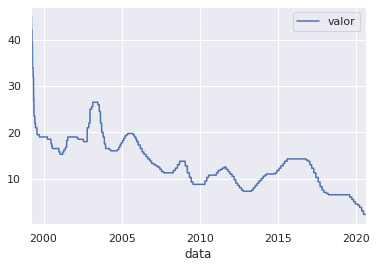

In [ ]:
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
selic_meta.plot()

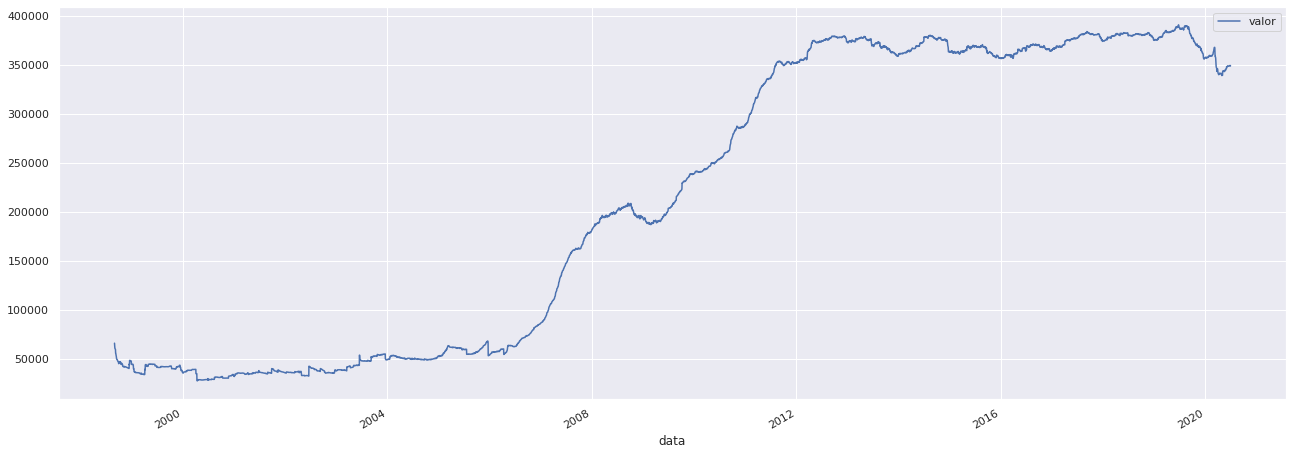

In [ ]:
reservas_internacionais = consulta_bc(13621)
reservas_internacionais.plot(figsize=(22,8))

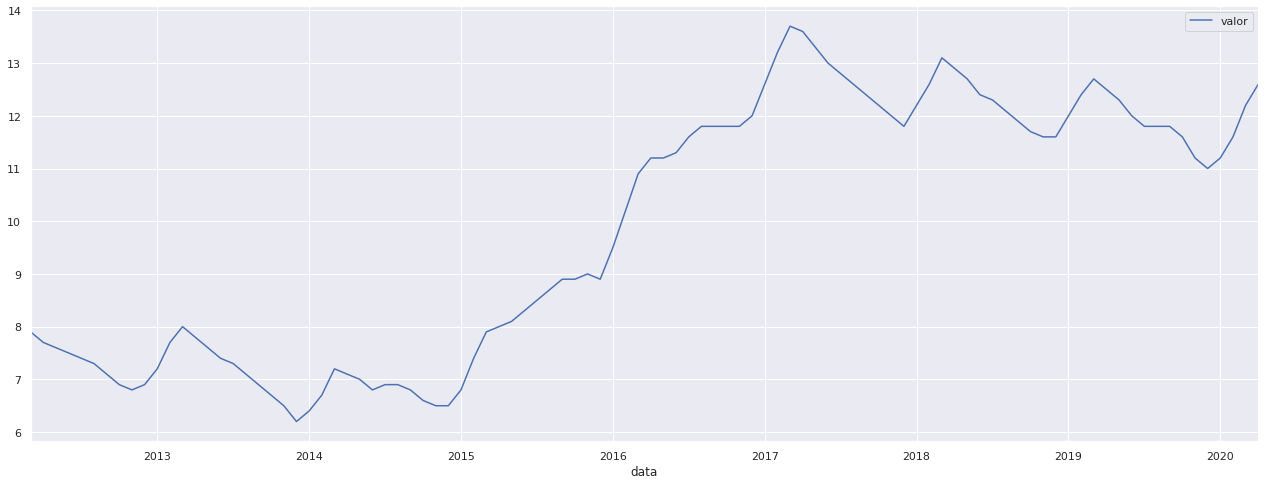

In [ ]:
pnad = consulta_bc(24369)
pnad.plot(figsize=(22,8))

In [ ]:
pnad

valor
data             
2012-03-01    7.9
2012-04-01    7.7
2012-05-01    7.6
2012-06-01    7.5
2012-07-01    7.4
...           ...
2019-12-01   11.0
2020-01-01   11.2
2020-02-01   11.6
2020-03-01   12.2
2020-04-01   12.6

[98 rows x 1 columns]

**CDI VS IBOV**

In [ ]:
data_inicio ='2015-01-01'
ibov =yf.download(tickers='^BVSP')[['Adj Close']]
ibov_retorno = ibov.pct_change()
ibov_retorno_acumulado =(1+ ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()#
ibov_retorno_acumulado.iloc[0] = 1 # so para começar de 1 na base de dados

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov_retorno_acumulado

Adj Close
Date                 
2015-01-02   1.000000
2015-01-05   0.950207
2015-01-06   0.959886
2015-01-07   0.989122
2015-01-08   0.998720
...               ...
2020-06-25   1.919391
2020-06-26   1.876417
2020-06-29   1.914432
2020-06-30   1.900854
2020-07-01   1.923795

[1358 rows x 1 columns]

In [ ]:
cdi = consulta_bc(12)
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio]/100).cumprod()
cdi_acumulado.iloc[0]= 1

In [ ]:
cdi_acumulado

valor
data                
2015-01-02  1.000000
2015-01-05  1.000869
2015-01-06  1.001304
2015-01-07  1.001739
2015-01-08  1.002175
...              ...
2020-06-24  1.627695
2020-06-25  1.627833
2020-06-26  1.627970
2020-06-29  1.628108
2020-06-30  1.628245

[1376 rows x 1 columns]

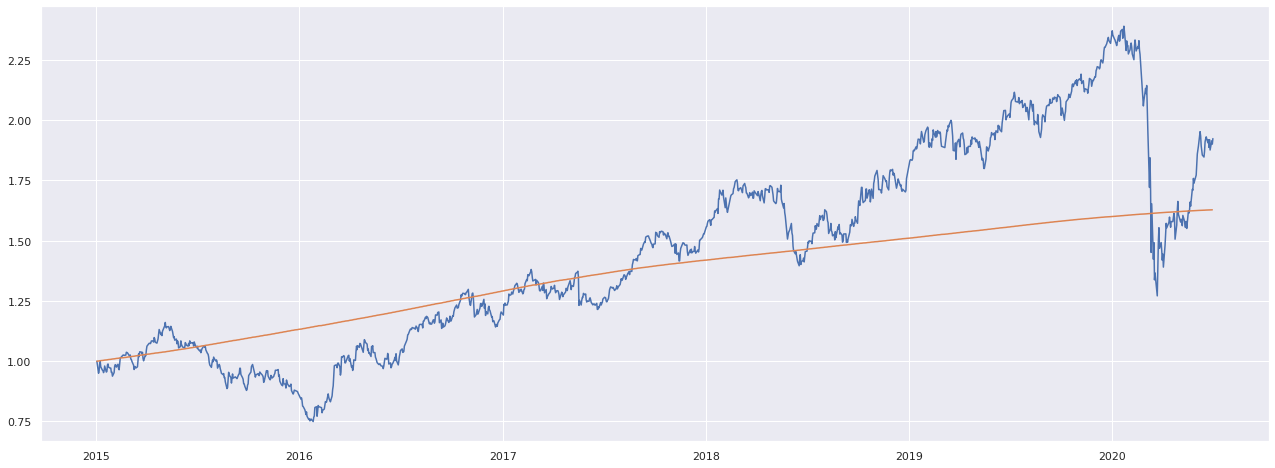

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado)

#10.Acessando Ivesting.com

In [ ]:
!pip install investpy
import investpy as inv

     |████████████████████████████████| 4.4MB 2.8MB/s 
     |████████████████████████████████| 245kB 42.7MB/s 
     |████████████████████████████████| 5.5MB 20.1MB/s 
  Created wheel for investpy: filename=investpy-0.9.14-cp36-none-any.whl size=4469457 sha256=91fdd6089738684ddc9710ebda006646527186a89443cd4c8faf7bad8605bf9a
  Stored in directory: /root/.cache/pip/wheels/86/35/ee/fc38f22f1353037b5118cff64b62aeed42f63f2c84135eaaaa
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16,8)

import plotly.graph_objects as go #consegue deixar os graficos mais dinamicos

## Fundos

In [ ]:
fundos_br = inv.get_funds_list(country="brazil")
fundos_br

['Fundo De Investimento Multimercado Bordeaux Iv Crédito Privado Investimento No Exterior',
 'Cshg Warrior V Fundo De Investimento Multimercado - Crédito Privado Investimento No Exterior',
 'A3 Viking Fi Em Quotas De Fi Multimercado Crédito Privado Investimento No Exterior',
 'Bb Espelho Multimercado Lp J. Safra Absoluto 30 Private Fic Fi',
 'Ctm Hedge Fundo De Investimento Multimercado - Longo Prazo',
 'Vif - Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado',
 'Fundo De Investimento Multimercado Bordeaux Iii Crédito Privado Investimento No Exterior',
 'Bb Top Tatico Fundo De Investimento Multimercado',
 'Epm Fundo De Investimento Multimercado Crédito Privado Investimento No Exterior',
 'Western Asset Multitrading H Multimercado Fundo De Investimento',
 'Concordia Phoenix Fundo De Investimento Multimercado Crédito Privado',
 'Fundo De Investimento Multimercado Irmb Crédito Privado - Investimento No Exterior',
 'Wm Multigestor Estratégia Fundo De Investimento Em Cot

In [ ]:
len(fundos_br)

5200

In [ ]:
fundos_br[:5]

['Fundo De Investimento Multimercado Bordeaux Iv Crédito Privado Investimento No Exterior',
 'Cshg Warrior V Fundo De Investimento Multimercado - Crédito Privado Investimento No Exterior',
 'A3 Viking Fi Em Quotas De Fi Multimercado Crédito Privado Investimento No Exterior',
 'Bb Espelho Multimercado Lp J. Safra Absoluto 30 Private Fic Fi',
 'Ctm Hedge Fundo De Investimento Multimercado - Longo Prazo']

In [ ]:
pesq = inv.search_funds(by='name',value='alaska black')
pesq

country  ... underlying
0  brazil  ...        NaN
1  brazil  ...        NaN
2  brazil  ...        NaN
3  brazil  ...        NaN
4  brazil  ...        NaN

[5 rows x 8 columns]

In [ ]:
pesq['name'][0]
fundo = 'Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I'
alaska = inv.get_fund_historical_data(fundo, country='brazil', from_date='01/01/1900', to_date='26/04/2020')['Close']
alaska

Date
2011-01-25    0.999
2011-01-26    0.991
2011-01-27    0.977
2011-01-28    0.956
2011-01-31    0.953
              ...  
2020-04-17    1.729
2020-04-20    1.773
2020-04-22    1.816
2020-04-23    1.793
2020-04-24    1.700
Name: Close, Length: 2318, dtype: float64

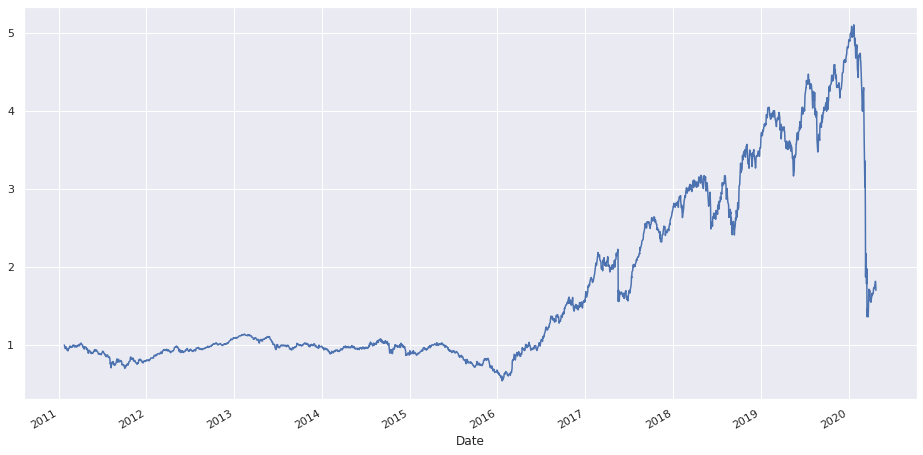

In [ ]:
alaska.plot()

In [ ]:
pesq2 =  inv.search_funds(by='name',value='ip parti')
pesq2

country  ... underlying
0  brazil  ...        NaN
1  brazil  ...        NaN
2  brazil  ...        NaN

[3 rows x 8 columns]

In [ ]:
pesq2['name'][1]
fundo = 'Ip Participações Ipg Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações Bdr Nível I'
ip = inv.get_fund_historical_data(fundo, country='brazil', from_date='01/01/1900', to_date='26/04/2020')['Close']
ip

Date
2017-06-29    2.277
2017-06-30    2.293
2017-07-03    2.292
2017-07-04    2.291
2017-07-05    2.294
              ...  
2020-04-17    3.051
2020-04-20    3.075
2020-04-22    3.113
2020-04-23    3.107
2020-04-24    3.076
Name: Close, Length: 700, dtype: float64

In [ ]:
inv.get_etfs_overview(country='brazil')

country                                     name  ... turnover currency
0   brazil                         Ishares Ibovespa  ...  7350000      BRL
1   brazil          It Now Ibovespa Fundo De Indice  ...  1630000      BRL
2   brazil            iShares BM&FBOVESPA Small Cap  ...   905860      BRL
3   brazil           Fundo de Invest Ishares SP 500  ...   440930      BRL
4   brazil         It Now Small Cap Fundo de indice  ...   122550      BRL
5   brazil      ETF Bradesco Ibovespa Fdo De Indice  ...   120500      BRL
6   brazil                      It Now PIBB IBrX-50  ...   112200      BRL
7   brazil                         BB SP Dividendos  ...    41260      BRL
8   brazil                         It Now SP500 TRN  ...    15020      BRL
9   brazil                              It Now IDIV  ...    14160      BRL
10  brazil                              It Now IFNC  ...     2480      BRL
11  brazil                              It Now IGCT  ...     1050      BRL
12  brazil  iShares Carbono Eficiente (ICO2) Brasil  ...      900      BRL
13  brazil                      iShares IBrX Brasil  ...      670      BRL
14  brazil                           CAIXA Ibovespa  ...      270      BRL
15  brazil                              It Now IMAT  ...       30      BRL
16  brazil                               It Now ISE  ...       20      BRL

[17 rows x 8 columns]

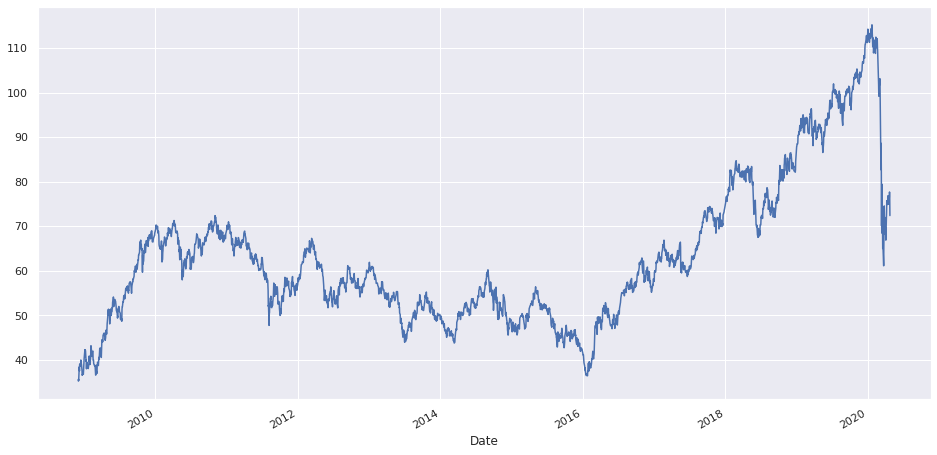

In [ ]:
bova11 = inv.get_etf_historical_data('Ishares Ibovespa',country='brazil',from_date='01/01/1900',to_date='25/04/2020')['Close']
bova11.plot()

In [ ]:

comparativo = ps.DataFrame()
data_inicio = ip.index[0]

comparativo['ip'] = ip / ip.loc[data_inicio]
comparativo['alaska'] = alaska / alaska.loc[data_inicio]
comparativo['bova11'] = bova11 / bova11.loc[data_inicio]

comparativo

ip    alaska    bova11
Date                                    
2017-06-29  1.000000  1.000000  1.000000
2017-06-30  1.007027  1.017791  1.013810
2017-07-03  1.006588  1.042945  1.016473
2017-07-04  1.006148  1.028834  1.017471
2017-07-05  1.007466  1.022699  1.015807
...              ...       ...       ...
2020-04-17  1.339921  1.060736  1.264559
2020-04-20  1.350461  1.087730  1.258902
2020-04-22  1.367150  1.114110  1.292845
2020-04-23  1.364515  1.100000  1.275374
2020-04-24  1.350900  1.042945  1.204825

[700 rows x 3 columns]

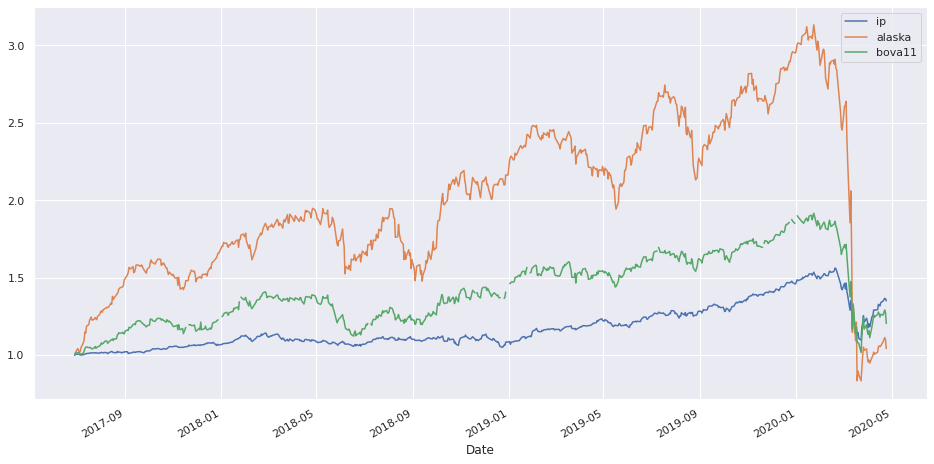

In [ ]:
comparativo.plot()

##Indices

In [ ]:
inv.get_indices_list('brazil')

['MSCI Brazil Net USD',
 'DJ Brazil',
 'TR Brazil 50',
 'MSCI Brazil Price USD',
 'DJ Brazil Titans 20 ADR',
 'BNY Mellon Brazil ADR',
 'BNY Mellon Brazil ADR TR',
 'BNY Mellon Brazil Classic ADR',
 'BNY Mellon Brazil Classic ADR TR',
 'FTSE RAFI Brazil 50',
 'MSCI Brazil 10 40',
 'DJ BRIC Brazil 15 Capped NTR',
 'DJ BRIC Brazil 15 USD',
 'DJ BRIC Brazil 15 EUR',
 'FTSE Brazil Infrastructure Extended',
 'MSCI Brazil Gross',
 'DJ Brazil Titans 20 ADR TR',
 'MSCI Brazil 25-50 Price',
 'MSCI Brazil 20-50 Gross Return',
 'MSCI Brazil 25-50 Net Return',
 'FTSE Brazil Infrastructure Extended USD PR',
 'FTSE Brazil Infrastructure Extended Total Return',
 'FTSE Brazil Infrastructure Extended Net Tax Total',
 'FTSE Brazil Infrastructure Extended Net Tax USD TR',
 'DJ BRIC Brazil 15 DR',
 'MSCI Brazil',
 'BM&FBOVESPA Unsponsored BDRX',
 'Small Cap Index',
 'Tag Along',
 'Brazil broad-Based',
 'Brazil Index',
 'Mid-Large Cap Index',
 'Public Utilities',
 'BM&FBOVESPA Real Estate IFIX',
 'Financia

In [ ]:
inv.get_index_recent_data('Bovespa',country='brazil')


Open      High       Low     Close    Volume Currency
Date                                                                 
2020-06-08  94640.43  97693.47  94635.19  97644.67  11096543      BRL
2020-06-09  97644.34  97644.34  95385.81  96746.55  11292087      BRL
2020-06-10  96747.32  97645.85  94664.81  94685.98  11739633      BRL
2020-06-12  94677.14  94703.26  90810.98  92795.27  12785559      BRL
2020-06-15  92780.35  93111.62  90147.92  92375.52  13317494      BRL
2020-06-16  92386.66  95215.56  92386.66  93531.17  12034206      BRL
2020-06-17  93531.17  96611.40  93531.17  95547.29  11134708      BRL
2020-06-18  95547.20  97109.54  94697.53  96125.24  10008482      BRL
2020-06-19  96137.89  97540.33  95874.30  96572.10  13134388      BRL
2020-06-22  96572.24  96870.44  94868.81  95335.96   8264673      BRL
2020-06-23  95343.52  97485.59  95343.52  95975.16   9752695      BRL
2020-06-24  95973.81  95973.81  93259.07  94377.36   9962706      BRL
2020-06-25  94382.05  96259.70  94151.83  95983.09   8697938      BRL
2020-06-26  95979.03  95979.03  93513.70  93834.49   8439076      BRL
2020-06-29  93836.94  95735.35  93825.27  95735.35   8906772      BRL
2020-06-30  95727.60  96257.30  94806.47  95055.82  10144493      BRL
2020-07-01  95061.62  96851.75  95061.62  96203.20  10163349      BRL
2020-07-02  96205.58  97864.16  96051.85  96234.96  10062907      BRL
2020-07-03  96236.97  96764.87  95803.32  96764.85   5351814      BRL
2020-07-06  96775.74  99256.85  96767.64  98937.16   9489369      BRL
2020-07-07  98937.40  98938.00  97272.02  97761.04   8951409      BRL
2020-07-08  97764.95  99972.78  97764.95  99769.88   9142741      BRL

In [ ]:
ibov = inv.get_index_historical_data('Bovespa',country='brazil',from_date='01/01/1900',to_date='26/04/2020')
ibov

Open      High       Low     Close     Volume Currency
Date                                                                  
2000-12-27  14804.50  15222.92  14804.50  15186.15  239975392      BRL
2000-12-28  15188.21  15269.30  15132.06  15259.29  324256128      BRL
2001-01-02  15242.11  15621.41  15173.61  15425.34  230631104      BRL
2001-01-03  15425.41  16599.42  15251.12  16599.42  381195200      BRL
2001-01-04  16596.78  16933.39  16586.85  16675.06  331230784      BRL
...              ...       ...       ...       ...        ...      ...
2020-04-17  77817.46  79846.43  77754.45  78990.29    8317760      BRL
2020-04-20  78988.64  80105.99  76942.89  78972.76    8874705      BRL
2020-04-22  78972.83  81183.73  78972.76  80687.15    9848913      BRL
2020-04-23  80690.35  81933.50  78621.92  79673.30   10823453      BRL
2020-04-24  79666.62  79666.62  72040.82  75330.61   16529162      BRL

[4812 rows x 6 columns]

In [ ]:
ibov_dolarizado = inv.get_index_historical_data('Ibovespa USD',country='brazil',from_date='01/01/1900',to_date='26/04/2020')
ibov_dolarizado

Open      High       Low     Close    Volume Currency
Date                                                                 
2018-02-19  26107.97  26268.69  26107.97  26201.34   2153492      BRL
2018-02-20  26218.10  26550.05  25925.54  26317.45   4204220      BRL
2018-02-21  26400.40  26839.02  26361.47  26368.51   4964374      BRL
2018-02-22  26437.20  26742.46  26402.32  26588.26   3645050      BRL
2018-02-23  26598.55  26902.36  26576.62  26860.11   4307772      BRL
...              ...       ...       ...       ...       ...      ...
2020-04-17  14861.15  15248.64  14849.12  15085.13   8317760      BRL
2020-04-20  14856.42  15066.58  14471.65  14853.44   8874705      BRL
2020-04-22  14873.83  15078.42  14667.77  14784.36   9848913      BRL
2020-04-23  14873.83  15044.43  14390.81  14390.81  10823453      BRL
2020-04-24  14873.83  14873.83  12806.13  12806.13   6804730      BRL

[536 rows x 6 columns]

In [ ]:
ifix = inv.get_index_historical_data('BM&FBOVESPA Real Estate IFIX',country='brazil',from_date='01/01/1900',to_date='26/04/2020')
ifix

Open     High      Low    Close  Volume Currency
Date                                                           
2013-01-10  1587.96  1590.77  1584.30  1589.87       0      BRL
2013-01-11  1589.87  1590.03  1583.66  1587.21       0      BRL
2013-01-14  1587.22  1588.46  1582.70  1584.45       0      BRL
2013-01-15  1584.96  1587.13  1581.59  1583.76       0      BRL
2013-01-16  1583.76  1584.76  1578.58  1583.12       0      BRL
...             ...      ...      ...      ...     ...      ...
2020-04-17  2550.18  2571.20  2550.18  2559.48       0      BRL
2020-04-20  2559.47  2563.27  2551.47  2555.55       0      BRL
2020-04-22  2555.55  2577.55  2555.55  2573.06       0      BRL
2020-04-23  2573.11  2599.57  2573.11  2592.54       0      BRL
2020-04-24  2592.54  2597.51  2526.24  2528.53       0      BRL

[1803 rows x 6 columns]

In [ ]:
indices = ps.DataFrame()
data_inicio = ifix.index[0]

indices['ifix'] = ifix['Close'] / ifix['Close'].loc[data_inicio]
indices['ibov'] = ibov['Close'] / ibov['Close'].loc[data_inicio]

indices

ifix      ibov
Date                          
2013-01-10  1.000000  1.000000
2013-01-11  0.998327  0.997067
2013-01-14  0.996591  1.006525
2013-01-15  0.996157  1.000799
2013-01-16  0.995754  1.001768
...              ...       ...
2020-04-17  1.609867  1.280682
2020-04-20  1.607396  1.280398
2020-04-22  1.618409  1.308193
2020-04-23  1.630662  1.291756
2020-04-24  1.590400  1.221347

[1803 rows x 2 columns]

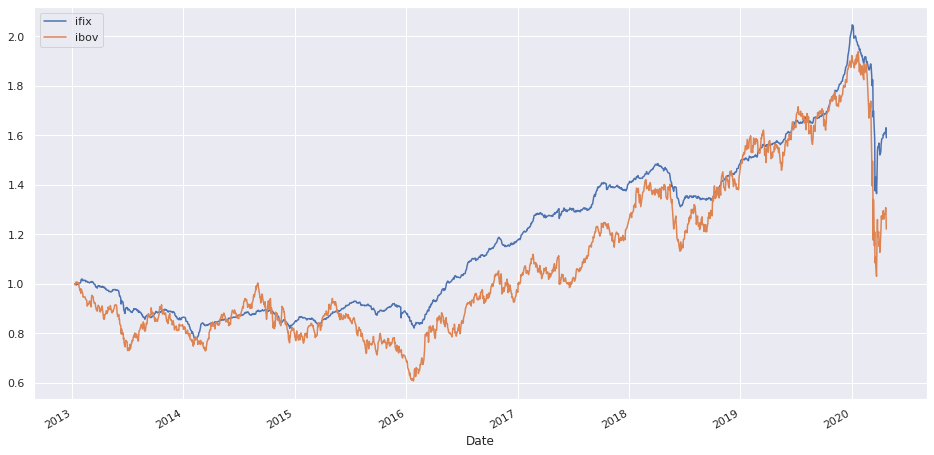

In [ ]:
indices.plot()

##Açoes

In [ ]:
inv.get_stocks('brazil')

country                name  ... currency  symbol
0    brazil       ABC BRASIL PN  ...      BRL   ABCB4
1    brazil       BRASILAGRO ON  ...      BRL   AGRO3
2    brazil          RUMO ON NM  ...      BRL   RAIL3
3    brazil       ALPARGATAS ON  ...      BRL   ALPA3
4    brazil       ALPARGATAS PN  ...      BRL   ALPA4
..      ...                 ...  ...      ...     ...
744  brazil  Integral Brei Reit  ...      BRL  IBFF11
745  brazil             Vbi Cri  ...      BRL  CVBI11
746  brazil        Hedge Realty  ...      BRL  HRDF11
747  brazil              Rb Cap  ...      BRL  RSPD11
748  brazil            Treecorp  ...      BRL  TCPF11

[749 rows x 6 columns]

In [ ]:
inv.get_stock_company_profile('bbdc4',country='brazil')

{'desc': 'Banco Bradesco S.A. is a commercial bank. The Bank offers a range of banking and financial products and services in Brazil and abroad to individuals, large, mid-sized and small companies, and local and international corporations and institutions. Its segments include Financial; Insurance and Capitalization bonds; Pension plans, and Other Activities. The Financial segment consists of financial institutions and holding companies, which are responsible for managing financial resources, and credit card, consortium and asset management companies. The Insurance Group segment comprises insurance, pension plan and capitalization bond companies. It offers banking services, including deposit-taking activities, individual and corporate banking services, credit and debit cards, leasing operations, investment banking, asset management, consortium services and others. Its insurance services include health insurance, life and personal accident insurance, automobile, casualty and pension pla

In [ ]:
bradesco = inv.get_stock_historical_data('bbdc4',country='brazil',from_date='01/01/1900',to_date='24/04/2020')
bradesco

Open   High    Low  Close    Volume Currency
Date                                                     
1992-10-20   0.00   0.00   0.00   0.00         0      BRL
1992-10-21   0.00   0.00   0.00   0.00         0      BRL
1992-10-22   0.00   0.00   0.00   0.00         0      BRL
1992-10-23   0.00   0.00   0.00   0.00         0      BRL
1992-10-26   0.00   0.00   0.00   0.00         0      BRL
...           ...    ...    ...    ...       ...      ...
2020-04-17  20.46  20.67  19.74  20.34  26562000      BRL
2020-04-20  19.86  20.06  19.53  19.68  41270000      BRL
2020-04-22  19.48  20.12  19.35  19.61  43115000      BRL
2020-04-23  19.88  20.13  19.01  19.33  42453000      BRL
2020-04-24  19.01  19.20  17.18  17.82  72532000      BRL

[6761 rows x 6 columns]

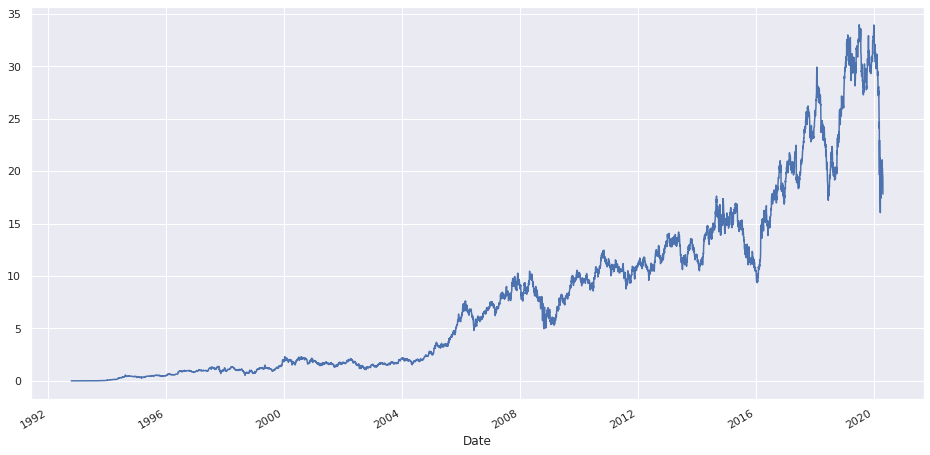

In [ ]:
bradesco['Close'].plot()

In [ ]:
inv.get_stock_information('bbdc4',country='brazil')

Stock Symbol  Prev. Close  ... Shares Outstanding  Next Earnings Date
0        BBDC4        22.45  ...       8.835527e+09          30/07/2020

[1 rows x 16 columns]

In [ ]:
inv.technical_indicators('bbdc4',country='brazil',product_type='stock')

technical_indicator     value           signal
0               RSI(14)   57.5540              buy
1            STOCH(9,6)   55.3430              buy
2          STOCHRSI(14)   77.2760       overbought
3           MACD(12,26)    0.5000              buy
4               ADX(14)   30.3640              buy
5           Williams %R  -14.5450       overbought
6               CCI(14)  101.5971              buy
7               ATR(14)    0.8236  less_volatility
8        Highs/Lows(14)    0.5192              buy
9   Ultimate Oscillator   50.5520          neutral
10                  ROC    0.6730              buy
11  Bull/Bear Power(13)    0.8760              buy

In [ ]:
inv.moving_averages('bbdc4',country='brazil',product_type='stock')

period  sma_value sma_signal  ema_value ema_signal
0      5      21.87        buy      21.93        buy
1     10      21.47        buy      21.74        buy
2     20      21.62        buy      21.36        buy
3     50      20.17        buy      21.11        buy
4    100      21.35        buy      22.16        buy
5    200      25.98       sell      24.51       sell

##Curva de juros

In [ ]:
bondsBR = inv.get_bonds_list('brazil')

In [ ]:
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [ ]:
bonds_overview  = inv.get_bonds_overview('brazil')
bonds_overview

country        name   last  ...    low   change  change_percentage
0  brazil   Brazil 3M  2.120  ...  2.115   -0.005             -0.24%
1  brazil   Brazil 6M  2.230  ...  2.210   +0.050             +2.29%
2  brazil   Brazil 9M  2.213  ...  2.213  +-0.003            +-0.11%
3  brazil   Brazil 1Y  2.500  ...  2.420   -0.005             -0.20%
4  brazil   Brazil 2Y  3.323  ...  3.323  +-0.003            +-0.08%
5  brazil   Brazil 3Y  4.614  ...  4.614  +-0.021            +-0.46%
6  brazil   Brazil 5Y  5.445  ...  5.420   -0.021             -0.38%
7  brazil   Brazil 8Y  6.149  ...  6.170   -0.021             -0.34%
8  brazil  Brazil 10Y  6.497  ...  6.525   -0.028             -0.43%

[9 rows x 8 columns]

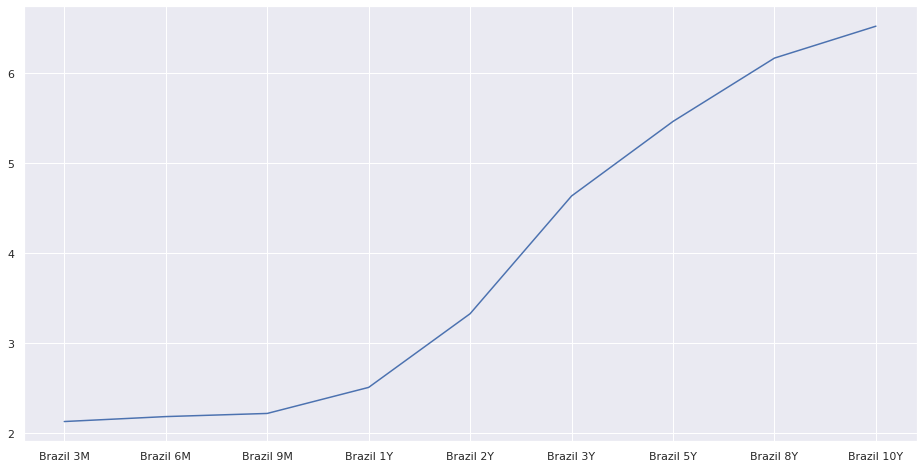

In [ ]:
plt.plot(bondsBR, bonds_overview['last_close']);

In [ ]:
data_inicio = '01/01/2010'
data_fim = '28/04/2020'

um_ano = inv.get_bond_historical_data('Brazil 1Y', from_date=data_inicio, to_date=data_fim)
um_ano

bonds = ps.DataFrame()

for prazo in bondsBR:
  bonds[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim)['Close']

bonds.index = ps.to_datetime(bonds.index)
bonds


Brazil 3M  Brazil 6M  Brazil 9M  ...  Brazil 5Y  Brazil 8Y  Brazil 10Y
Date                                         ...                                  
2010-01-04      8.680      9.170     10.475  ...     12.740        NaN         NaN
2010-01-05      8.670      9.170     10.445  ...     12.740        NaN         NaN
2010-01-06      8.670      9.140     10.330  ...     12.740        NaN         NaN
2010-01-07      8.700      9.140     10.330  ...     12.770        NaN         NaN
2010-01-08      8.650      9.110     10.300  ...     12.760        NaN         NaN
...               ...        ...        ...  ...        ...        ...         ...
2020-04-22      3.070      2.775      2.715  ...      5.780      6.600       6.925
2020-04-23      3.085      2.835      2.855  ...      6.095      6.890       7.190
2020-04-24      3.290      3.170      3.345  ...      6.180      6.990       7.275
2020-04-27      3.325      3.265      3.495  ...      7.375      8.225       8.490
2020-04-28      3.160      2.950      2.990  ...      6.480      7.345       7.720

[1212 rows x 9 columns]

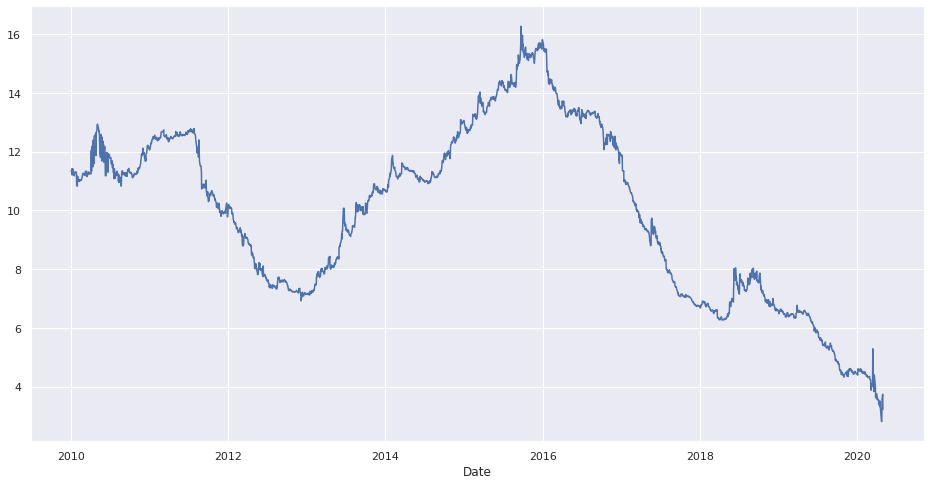

In [ ]:
um_ano['Close'].plot()

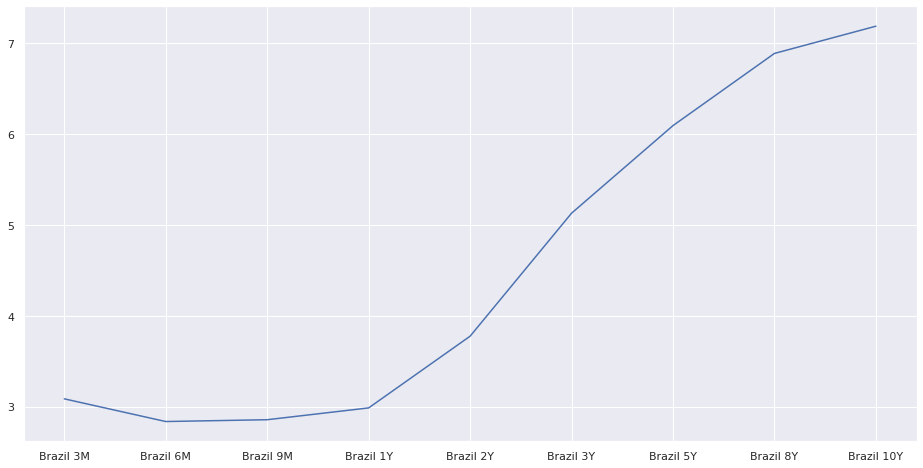

In [ ]:
plt.plot(bondsBR , bonds.loc['2020-04-23'].values);

In [ ]:
fig = go.Figure()

for i in bonds.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bonds.loc[i] ,mode='lines', name=str(i)))

fig.show()

In [ ]:
data_inicio = '01/01/2010'
data_fim = '28/04/2020'
bondsMensal = ps.DataFrame()

for prazo in bondsBR:
  bondsMensal[prazo] = inv.get_bond_historical_data(prazo, from_date = data_inicio, to_date=data_fim,interval='Monthly')['Close']
bondsMensal


Brazil 3M  Brazil 6M  Brazil 9M  ...  Brazil 5Y  Brazil 8Y  Brazil 10Y
Date                                         ...                                  
2010-01-01      8.670      9.110     10.350  ...     12.760        NaN         NaN
2010-02-01      8.773      9.330     10.500  ...        NaN        NaN         NaN
2010-03-01      9.195      9.870     10.408  ...        NaN        NaN         NaN
2010-04-01     10.610     11.190     11.130  ...        NaN        NaN         NaN
2010-05-01     10.990     11.390     11.735  ...        NaN        NaN         NaN
...               ...        ...        ...  ...        ...        ...         ...
2019-12-01      4.603      4.370      4.350  ...      6.380      6.675       6.805
2020-01-01      4.233      4.205      4.280  ...      6.145      6.485       6.700
2020-02-01      4.178      4.100      4.090  ...      6.060      6.515       6.780
2020-03-01      3.425      3.240      3.380  ...      6.675      7.330       7.650
2020-04-01      3.124      2.920      2.980  ...      6.380      7.200       7.580

[70 rows x 9 columns]

In [ ]:
fig = go.Figure()

for i in bondsMensal.index:
  fig.add_trace(
      go.Scatter(
          x=bondsBR, 
          y=bondsMensal.loc[i] ,
          mode='lines', 
          name=str(i),
          visible = False
      )
  )
fig.data[0].visible = True

steps = []

for i in range(len(fig.data)):
  step = dict(
      method = 'restyle',
      args=['visible',[False] * len(fig.data)],
      label = fig.data[i]['name'][:7]
  )
  step['args'][1][i] = True
  steps.append(step)

sliders =[dict(
    active = 0,
    currentvalue={'prefix':"Mes: "},
    pad={'t':50},
    steps=steps
)]
fig.update_layout(
    sliders=sliders,
    yaxis = dict(range=[3,14.5])
)
#fig.show()



In [ ]:
#retirado do site, la tem o cod -- https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
#codigo_bcb = 433
def consulta_bc(codigo_bcb): #crindo como uma função
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = ps.read_json(url)
  df['data'] = ps.to_datetime(df['data'], dayfirst=True)# transformata formato da coluna data
  df.set_index('data',inplace=True) #setando data como index
  return df

In [ ]:
selic_meta = consulta_bc(432)

In [ ]:
s2015 = selic_meta[selic_meta.index.year >= 2015]
b2015 = bonds[bonds.index.year >= 2015]
s2015

valor
data             
2015-01-01  11.75
2015-01-02  11.75
2015-01-03  11.75
2015-01-04  11.75
2015-01-05  11.75
...           ...
2020-08-01   2.25
2020-08-02   2.25
2020-08-03   2.25
2020-08-04   2.25
2020-08-05   2.25

[2044 rows x 1 columns]

In [ ]:
fig = go.Figure()

for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode='lines', name=str(i)))

fig.add_trace(go.Scatter(x=s2015.index, y=s2015['valor'], mode='lines', name='SELIC', line={'color':'black'}))

fig.show()

#11.Integração com google sheets



In [ ]:
!pip install gspread

In [ ]:
#importando bibliotecas
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials

In [ ]:
#fazendo a autenticação
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
#criando planilha vazia
gc.create('Planilha01')

<Spreadsheet 'Planilha01' id:1G8VHkGOZ-qqr-SYhdYv6oAULETwaXWgt7fNZ6KQtXWg>

In [ ]:
#Abrindo Planilha
planilha = gc.open('Planilha01')

In [ ]:
#adicionando uma pagina
planilha.add_worksheet('nova_pagina',10,5)

<Worksheet 'nova_pagina' id:40087005>

In [ ]:
#selecionando uma pagina
pagina1 = planilha.get_worksheet(0)

In [ ]:
#apagando pagina
planilha.del_worksheet(pagina1)

{'replies': [{}],
 'spreadsheetId': '1yKOV-YR7csf6iG4X2yf1WRtgUiWxmta8EwVyuxgF7Bs'}

In [ ]:
#alterando valore
nova_pagina = planilha.get_worksheet(0)#selecionando pagina

nova_pagina.update_acell('a1', 120) #colocando valor pelo cod da celula

nova_pagina.update_cell(2,2, 'ola mundo')#passa pelo numero da linha


{'spreadsheetId': '1yKOV-YR7csf6iG4X2yf1WRtgUiWxmta8EwVyuxgF7Bs',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'nova_pagina!B2',
 'updatedRows': 1}

In [ ]:
lista_cel = nova_pagina.range('a1:b2')

valores = ['a','b','c','d']

for i, valor in enumerate(valores):
  lista_cel[i].value = valor

lista_cel

[<Cell R1C1 'a'>, <Cell R1C2 'b'>, <Cell R2C1 'c'>, <Cell R2C2 'd'>]

In [ ]:
nova_pagina.update_cells(lista_cel)

APIError: ignored

##Carteira de acoes(aula15)

In [ ]:
gc.create('Carteira')

In [ ]:
plan_carteira = gc.open('Carteira')

In [ ]:
carteira = ps.DataFrame(plan_carteira.sheet1.get_all_records())#pegando dados da pagina
carteira.set_index('Cod', inplace=True)#definindo o index como cod

carteira

Qte Cotação Entrada      Custo  No dia Preço Atual   Lucro R$  Lucro %
Cod                                                                           
VALE3   200   44,86   54,33  10.866,00  -4,00%    8.972,00  -1.894,00  -17,43%
PETR4   400   18,05   19,17   7.668,00  -0,82%    7.220,00    -448,00   -5,84%
ITUB4   300   22,77   38,03  11.409,00  -3,76%    6.831,00  -4.578,00  -40,13%
TAEE11  300   27,50   30,84   9.252,00  -0,72%    8.250,00  -1.002,00  -10,83%
LREN3   200   38,39   57,50  11.500,00  -5,33%    7.678,00  -3.822,00     -33,

In [ ]:
plan_carteira.add_worksheet('Cotações Yahoo', 1500, 71)#criando nova pagina

tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"
dados_yf = yf.download(tickers=tickers_ibov, period='5y')["Adj Close"]
pagina_yahoo = plan_carteira.get_worksheet(1)

[*********************100%***********************]  70 of 70 completed


In [ ]:
#instalando bibliotecas
!pip install gspread-dataframe
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [ ]:
#prenchendo os dados na planilha
#troque localidade em file ->config da planilha-> p USA p n dar erro nos ponto e 
#seleciona tudo e formata number
set_with_dataframe(pagina_yahoo, dados_yf, include_index=True)

In [ ]:
#puxando os dados do fundamentos para uma aba da planilha
plan_carteira.add_worksheet('fundamentus', 500, 20)
pagina_fundamentus = plan_carteira.get_worksheet(2)

In [ ]:
url = 'https://www.fundamentus.com.br/resultado.php'
df = ps.read_html(url, decimal=',', thousands='.')[0]
set_with_dataframe(pagina_fundamentus, df)

#12.Coletando dados da CVM(aula16)

In [ ]:
#Base de Dados: http://dados.cvm.gov.br/
ps.set_option("display.max_colwidth", 150)

In [ ]:
def busca_informes_cvm(ano, mes):                                                 #formata os dados com 2 digitos
  url = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{:02d}{:02d}.csv'.format(ano,mes)
  return ps.read_csv(url, sep=';')

def busca_cadastro_cvm(ano, mes, dia):
  url = 'http://dados.cvm.gov.br/dados/FI/CAD/DADOS/inf_cadastral_fi_{}{:02d}{:02d}.csv'.format(ano, mes, dia)
  return ps.read_csv(url, sep=';', encoding='ISO-8859-1')

In [ ]:
informes_diarios = busca_informes_cvm(2020,4)
informes_diarios

CNPJ_FUNDO   DT_COMPTC  ...   RESG_DIA  NR_COTST
0       00.017.024/0001-53  2020-04-01  ...       0.00         1
1       00.017.024/0001-53  2020-04-02  ...       0.00         1
2       00.017.024/0001-53  2020-04-03  ...       0.00         1
3       00.017.024/0001-53  2020-04-06  ...       0.00         1
4       00.017.024/0001-53  2020-04-07  ...       0.00         1
5       00.017.024/0001-53  2020-04-08  ...       0.00         1
6       00.017.024/0001-53  2020-04-09  ...       0.00         1
7       00.017.024/0001-53  2020-04-13  ...    4084.29         1
8       00.017.024/0001-53  2020-04-14  ...       0.00         1
9       00.017.024/0001-53  2020-04-15  ...       0.00         1
10      00.017.024/0001-53  2020-04-16  ...       0.00         1
11      00.017.024/0001-53  2020-04-17  ...       0.00         1
12      00.017.024/0001-53  2020-04-20  ...       0.00         1
13      00.017.024/0001-53  2020-04-22  ...       0.00         1
14      00.017.024/0001-53  2020-04-23  ...       0.00         1
15      00.017.024/0001-53  2020-04-24  ...       0.00         1
16      00.017.024/0001-53  2020-04-27  ...       0.00         1
17      00.017.024/0001-53  2020-04-28  ...       0.00         1
18      00.017.024/0001-53  2020-04-29  ...       0.00         1
19      00.017.024/0001-53  2020-04-30  ...       0.00         1
20      00.068.305/0001-35  2020-04-01  ...   35420.63      7677
21      00.068.305/0001-35  2020-04-02  ...   30186.86      7679
22      00.068.305/0001-35  2020-04-03  ...   38193.02      7675
23      00.068.305/0001-35  2020-04-06  ...  131895.69      7670
24      00.068.305/0001-35  2020-04-07  ...  115319.46      7664
...                    ...         ...  ...        ...       ...
346536  97.929.197/0001-80  2020-04-24  ...       0.00        12
346537  97.929.197/0001-80  2020-04-27  ...       0.00        12
346538  97.929.197/0001-80  2020-04-28  ...       0.00        12
346539  97.929.197/0001-80  2020-04-29  ...       0.00        12
346540  97.929.197/0001-80  2020-04-30  ...       0.00        12
346541  97.929.213/0001-34  2020-04-01  ...       0.00         2
346542  97.929.213/0001-34  2020-04-02  ...       0.00         2
346543  97.929.213/0001-34  2020-04-03  ...       0.00         2
346544  97.929.213/0001-34  2020-04-06  ...       0.00         2
346545  97.929.213/0001-34  2020-04-07  ...       0.00         2
346546  97.929.213/0001-34  2020-04-08  ...       0.00         2
346547  97.929.213/0001-34  2020-04-09  ...       0.00         2
346548  97.929.213/0001-34  2020-04-13  ...       0.00         2
346549  97.929.213/0001-34  2020-04-14  ...       0.00         2
346550  97.929.213/0001-34  2020-04-15  ...       0.00         2
346551  97.929.213/0001-34  2020-04-16  ...       0.00         2
346552  97.929.213/0001-34  2020-04-17  ...       0.00         2
346553  97.929.213/0001-34  2020-04-20  ...       0.00         2
346554  97.929.213/0001-34  2020-04-22  ...       0.00         2
346555  97.929.213/0001-34  2020-04-23  ...       0.00         2
346556  97.929.213/0001-34  2020-04-24  ...       0.00         2
346557  97.929.213/0001-34  2020-04-27  ...       0.00         2
346558  97.929.213/0001-34  2020-04-28  ...       0.00         2
346559  97.929.213/0001-34  2020-04-29  ...       0.00         2
346560  97.929.213/0001-34  2020-04-30  ...       0.00         2

[346561 rows x 8 columns]

In [ ]:
cadastro_cvm = busca_cadastro_cvm(2020,5,1)
cadastro_cvm

In [ ]:
minimo_cotistas = 100
#aplicando filtro
fundos = informes_diarios[informes_diarios['NR_COTST'] >= minimo_cotistas].pivot(index='DT_COMPTC', columns='CNPJ_FUNDO', #passando q as colunas tem de ser o cpf do fundo
                                                                                 values=['VL_TOTAL',	'VL_QUOTA',	'VL_PATRIM_LIQ',	'CAPTC_DIA',	'RESG_DIA'])
fundos

VL_TOTAL  ...           RESG_DIA
CNPJ_FUNDO 00.068.305/0001-35  ... 97.519.794/0001-36
DT_COMPTC                      ...                   
2020-04-01        52347266.29  ...          971670.38
2020-04-02        52286813.89  ...          434254.39
2020-04-03        52281604.34  ...         1015272.40
2020-04-06        52211795.07  ...          735636.46
2020-04-07        52099859.60  ...          182700.32
2020-04-08        52013743.91  ...         2535908.36
2020-04-09        52007899.94  ...         1215339.58
2020-04-13        51833455.31  ...         2234235.17
2020-04-14        51858224.53  ...         1117338.09
2020-04-15        51857507.07  ...         1004980.44
2020-04-16        51832604.49  ...          368631.57
2020-04-17        51810701.61  ...          582196.31
2020-04-20        51820626.96  ...          824703.47
2020-04-22        51794821.72  ...          327857.26
2020-04-23        51776604.59  ...          641327.73
2020-04-24        51908821.85  ...         1642396.26
2020-04-27        51840479.65  ...          758294.36
2020-04-28        51899720.19  ...          612883.79
2020-04-29        51637623.48  ...         1217948.08
2020-04-30        51697882.22  ...          914635.21

[20 rows x 13440 columns]

In [ ]:
#normalizando os valor das cotas
cotas_normalizadas = fundos['VL_QUOTA']/fundos['VL_QUOTA'].iloc[0]
cotas_normalizadas

CNPJ_FUNDO  00.068.305/0001-35  ...  97.519.794/0001-36
DT_COMPTC                       ...                    
2020-04-01            1.000000  ...            1.000000
2020-04-02            0.998858  ...            0.999741
2020-04-03            0.998892  ...            0.999819
2020-04-06            0.998952  ...            0.999796
2020-04-07            0.999054  ...            0.999857
2020-04-08            0.996981  ...            0.998284
2020-04-09            0.997111  ...            0.998446
2020-04-13            0.997230  ...            0.998504
2020-04-14            0.997369  ...            0.998756
2020-04-15            0.997486  ...            0.998773
2020-04-16            0.997891  ...            0.999007
2020-04-17            0.998008  ...            0.999325
2020-04-20            0.998270  ...            0.999579
2020-04-22            0.998444  ...            0.999846
2020-04-23            0.998800  ...            1.000228
2020-04-24            0.998404  ...            1.000380
2020-04-27            0.998443  ...            0.999944
2020-04-28            0.998950  ...            1.000080
2020-04-29            0.998836  ...            1.000666
2020-04-30            0.998981  ...            1.000899

[20 rows x 2688 columns]

In [ ]:
#fundos com melhores desempenho em Abril
melhores = ps.DataFrame()
melhores['retorno(%)'] = (cotas_normalizadas.iloc[-1].sort_values(ascending=False)[:5] - 1) * 100
melhores

retorno(%)
CNPJ_FUNDO                    
34.218.752/0001-45   44.941707
13.476.201/0001-01   42.572977
18.832.847/0001-06   39.202412
35.625.840/0001-24   38.137070
35.650.540/0001-03   37.972896

In [ ]:
#buscar dados pelo cnpj do fundo
for cnpj in melhores.index:
  fundo = cadastro_cvm[cadastro_cvm['CNPJ_FUNDO'] == cnpj]
  melhores.at[cnpj, 'Fundo de Investimento'] = fundo['DENOM_SOCIAL'].values[0]
  melhores.at[cnpj, 'Classe'] = fundo['CLASSE'].values[0]
  melhores.at[cnpj, 'PL'] = fundo['VL_PATRIM_LIQ'].values[0]

melhores

retorno(%)  ...            PL
CNPJ_FUNDO                      ...              
34.218.752/0001-45   44.941707  ...  1.346177e+08
13.476.201/0001-01   42.572977  ...  1.055573e+08
18.832.847/0001-06   39.202412  ...  1.477850e+08
35.625.840/0001-24   38.137070  ...  1.812153e+08
35.650.540/0001-03   37.972896  ...  1.856156e+07

[5 rows x 4 columns]

In [ ]:
piores = ps.DataFrame()
piores['retorno(%)'] = (cotas_normalizadas.iloc[-1].sort_values(ascending=True)[:5] - 1) * 100
piores

retorno(%)
CNPJ_FUNDO                    
35.780.106/0001-30  -17.063642
31.188.723/0001-90   -9.569397
16.599.959/0001-25   -5.789261
10.869.628/0001-81   -5.664139
10.590.125/0001-72   -5.214088

In [ ]:
for cnpj in piores.index:
  fundo = cadastro_cvm[cadastro_cvm['CNPJ_FUNDO'] == cnpj]
  piores.at[cnpj, 'Fundo de Investimento'] = fundo['DENOM_SOCIAL'].values[0]
  piores.at[cnpj, 'Classe'] = fundo['CLASSE'].values[0]
  piores.at[cnpj, 'PL'] = fundo['VL_PATRIM_LIQ'].values[0]

piores

retorno(%)  ...           PL
CNPJ_FUNDO                      ...             
35.780.106/0001-30  -17.063642  ...   8578774.80
31.188.723/0001-90   -9.569397  ...  36855942.92
16.599.959/0001-25   -5.789261  ...  74482136.46
10.869.628/0001-81   -5.664139  ...  20684030.83
10.590.125/0001-72   -5.214088  ...   6563087.43

[5 rows x 4 columns]

#13.Melhores e piores Fundos de 2020(aula17)

In [ ]:
from pandas.tseries.offsets import BDay
from datetime import date
ps.set_option("display.max_colwidth", 150)

##Coleta e tratamento

In [ ]:
def busca_cadastro_cvm(data=(date.today()-BDay(2))):
  if data is not busca_cadastro_cvm.__defaults__[0]:
    data = ps.to_datetime(data)
  
  try:
    url = 'http://dados.cvm.gov.br/dados/FI/CAD/DADOS/inf_cadastral_fi_{}{:02d}{:02d}.csv'.format(data.year, data.month, data.day)
    return ps.read_csv(url, sep=';', encoding='ISO-8859-1')

  except: 
    print("Arquivo {} não encontrado!".format(url))
    print("Forneça outra data!")

In [ ]:
def busca_informes_diarios_cvm_por_periodo(data_inicio, data_fim):
  datas = ps.date_range(data_inicio, data_fim, freq='MS') 
  informe_completo = ps.DataFrame()

  for data in datas:
    try:
      url ='http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{}{:02d}.csv'.format(data.year, data.month)
      informe_mensal = ps.read_csv(url, sep=';')    
    
    except: 
      print("Arquivo {} não encontrado!".format(url))    

    informe_completo = ps.concat([informe_completo, informe_mensal], ignore_index=True)

  return informe_completo

In [ ]:
def melhores_e_piores(informes, cadastro, top=5, minimo_de_cotistas=100, classe=''):  
  cadastro      = cadastro[cadastro['SIT'] == 'EM FUNCIONAMENTO NORMAL']
  fundos        = informes[informes['NR_COTST'] >= minimo_de_cotistas]
  cnpj_informes = fundos['CNPJ_FUNDO'].drop_duplicates()
  
  fundos = fundos.pivot(index='DT_COMPTC', columns='CNPJ_FUNDO')  
  cotas_normalizadas = fundos['VL_QUOTA'] / fundos['VL_QUOTA'].iloc[0]
  
  if classe == 'multimercado':
    cnpj_cadastro      = cadastro[cadastro['CLASSE'] == 'Fundo Multimercado']['CNPJ_FUNDO']   
    cotas_normalizadas = cotas_normalizadas[cnpj_cadastro[cnpj_cadastro.isin(cnpj_informes)]]

  if classe == 'acoes':
    cnpj_cadastro      = cadastro[cadastro['CLASSE'] == 'Fundo de Ações']['CNPJ_FUNDO']   
    cotas_normalizadas = cotas_normalizadas[cnpj_cadastro[cnpj_cadastro.isin(cnpj_informes)]]

  if classe == 'rendafixa':
    cnpj_cadastro      = cadastro[cadastro['CLASSE'] == 'Fundo de Renda Fixa']['CNPJ_FUNDO']   
    cotas_normalizadas = cotas_normalizadas[cnpj_cadastro[cnpj_cadastro.isin(cnpj_informes)]]

  if classe == 'cambial':
    cnpj_cadastro      = cadastro[cadastro['CLASSE'] == 'Fundo Cambial']['CNPJ_FUNDO']   
    cotas_normalizadas = cotas_normalizadas[cnpj_cadastro[cnpj_cadastro.isin(cnpj_informes)]]
  
  #melhores
  melhores = ps.DataFrame()
  melhores['retorno(%)'] = (cotas_normalizadas.iloc[-1].sort_values(ascending=False)[:top] - 1) * 100
  for cnpj in melhores.index:
    fundo = cadastro[cadastro['CNPJ_FUNDO'] == cnpj]
    melhores.at[cnpj, 'Fundo de Investimento'] = fundo['DENOM_SOCIAL'].values[0]
    melhores.at[cnpj, 'Classe']                = fundo['CLASSE'].values[0]
    melhores.at[cnpj, 'PL']                    = fundo['VL_PATRIM_LIQ'].values[0]

  #piores
  piores = ps.DataFrame()
  piores['retorno(%)'] = (cotas_normalizadas.iloc[-1].sort_values(ascending=True)[:top] - 1) * 100
  for cnpj in piores.index:
    fundo = cadastro[cadastro['CNPJ_FUNDO'] == cnpj]
    piores.at[cnpj, 'Fundo de Investimento'] = fundo['DENOM_SOCIAL'].values[0]
    piores.at[cnpj, 'Classe']                = fundo['CLASSE'].values[0]
    piores.at[cnpj, 'PL']                    = fundo['VL_PATRIM_LIQ'].values[0]
  
  return melhores, piores

In [ ]:
def consulta_fundo(informes, cnpj):  
  fundo = informes[informes['CNPJ_FUNDO'] == cnpj].copy()
  fundo.set_index('DT_COMPTC', inplace=True)
  fundo['cotas_normalizadas'] = fundo['VL_QUOTA'] / fundo['VL_QUOTA'].iloc[0]
  return fundo

##Chamando as funcoes

In [ ]:
cadastro = busca_cadastro_cvm()
informes = busca_informes_diarios_cvm_por_periodo(data_inicio='2020-01', data_fim='2020-05')

In [ ]:
cadastro

CNPJ_FUNDO  ...                                                                 CONTROLADOR
0      36.498.416/0001-29  ...                                   BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
1      36.729.776/0001-94  ...                                   BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
2      36.499.643/0001-79  ...                                   BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
3      36.017.639/0001-27  ...  SANTANDER CACEIS BRASIL DISTRIBUIDORA DE TITULOS E VALORES MOBILIARIOS S.A
4      36.016.411/0001-12  ...                                   BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
...                   ...  ...                                                                         ...
37366  31.340.900/0001-01  ...                                   BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
37367  35.803.277/0001-37  ...                                   BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
37368  28.433.700/0001-99  ...                                                                         NaN
37369  26.786.783/0001-74  ...                                   BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM
37370  06.086.351/0001-43  ...                                                                         NaN

[37371 rows x 36 columns]

In [ ]:
informes

CNPJ_FUNDO   DT_COMPTC  ...  RESG_DIA  NR_COTST
0        00.017.024/0001-53  2020-01-02  ...       0.0         1
1        00.017.024/0001-53  2020-01-03  ...       0.0         1
2        00.017.024/0001-53  2020-01-06  ...       0.0         1
3        00.017.024/0001-53  2020-01-07  ...       0.0         1
4        00.017.024/0001-53  2020-01-08  ...       0.0         1
...                     ...         ...  ...       ...       ...
1748576  97.929.213/0001-34  2020-05-25  ...       0.0         2
1748577  97.929.213/0001-34  2020-05-26  ...       0.0         2
1748578  97.929.213/0001-34  2020-05-27  ...       0.0         2
1748579  97.929.213/0001-34  2020-05-28  ...       0.0         2
1748580  97.929.213/0001-34  2020-05-29  ...       0.0         2

[1748581 rows x 8 columns]

In [ ]:
#geral
melhores, piores = melhores_e_piores(informes, cadastro, top=10, minimo_de_cotistas=100)
melhores

retorno(%)  ...            PL
CNPJ_FUNDO                      ...              
34.979.818/0001-10   49.922558  ...  1.323208e+08
09.601.190/0001-77   44.515897  ...  3.236779e+08
33.925.149/0001-30   43.413670  ...  2.472524e+08
24.454.718/0001-16   38.713819  ...  1.216182e+08
33.144.687/0001-98   34.238679  ...  1.963140e+08
01.623.535/0001-81   33.986018  ...  9.616266e+08
31.132.386/0001-19   33.919504  ...  1.694268e+08
01.430.938/0001-04   33.825920  ...  1.631576e+08
02.294.024/0001-26   33.823079  ...  2.306246e+08
28.516.058/0001-01   33.772301  ...  1.652441e+07

[10 rows x 4 columns]

In [ ]:
piores

retorno(%)  ...            PL
CNPJ_FUNDO                      ...              
24.837.071/0001-01  -75.927681  ...  1.107866e+06
26.648.868/0001-96  -58.658495  ...  4.289626e+08
12.987.743/0001-86  -58.628503  ...  1.704099e+09
31.936.857/0001-41  -56.473327  ...  1.050557e+08
10.869.628/0001-81  -52.266591  ...  2.507731e+07
10.590.125/0001-72  -51.921386  ...  7.302818e+06
11.182.072/0001-13  -48.983827  ...  1.889453e+08
10.292.302/0001-34  -48.087959  ...  1.233565e+08
32.319.324/0001-83  -46.849821  ...  9.873302e+06
10.601.479/0001-75  -44.410988  ...  4.920943e+07

[10 rows x 4 columns]

In [ ]:
#acoes
melhores, piores = melhores_e_piores(informes, cadastro, top=10, minimo_de_cotistas=100, classe='acoes')
melhores

retorno(%)  ...            PL
CNPJ_FUNDO                      ...              
19.831.126/0001-36   32.916286  ...  9.662163e+08
13.199.100/0001-30   30.453904  ...  3.069802e+07
17.503.172/0001-80   25.018572  ...  3.274044e+08
34.028.082/0001-02   24.468864  ...  7.467436e+07
22.632.237/0001-28   23.986235  ...  2.444983e+08
13.401.224/0001-57   23.985009  ...  2.402886e+08
19.436.818/0001-80   20.689707  ...  1.100452e+09
19.436.835/0001-17   20.169119  ...  7.427738e+08
21.347.643/0001-86   20.106906  ...  5.716255e+07
34.218.661/0001-00   18.175205  ...  4.586482e+07

[10 rows x 4 columns]

In [ ]:
piores

retorno(%)  ...            PL
CNPJ_FUNDO                      ...              
26.648.868/0001-96  -58.658495  ...  4.289626e+08
12.987.743/0001-86  -58.628503  ...  1.704099e+09
31.936.857/0001-41  -56.473327  ...  1.050557e+08
10.869.628/0001-81  -52.266591  ...  2.507731e+07
10.590.125/0001-72  -51.921386  ...  7.302818e+06
10.292.302/0001-34  -48.087959  ...  1.233565e+08
32.319.324/0001-83  -46.849821  ...  9.873302e+06
10.601.479/0001-75  -44.410988  ...  4.920943e+07
10.551.375/0001-01  -42.342952  ...  5.268381e+08
09.648.050/0001-54  -42.187361  ...  3.990557e+08

[10 rows x 4 columns]

In [ ]:
#renda fixa
melhores, piores = melhores_e_piores(informes, cadastro, top=10, minimo_de_cotistas=100, classe='rendafixa')
melhores

retorno(%)  ...            PL
CNPJ_FUNDO                      ...              
30.606.402/0001-03   33.647380  ...  4.536751e+07
00.360.293/0001-18   32.205712  ...  1.579284e+08
26.751.304/0001-84   28.983356  ...  3.975523e+07
04.877.280/0001-71   14.091167  ...  4.658991e+07
04.240.128/0001-83   10.915954  ...  5.951841e+07
03.737.207/0001-31    9.160906  ...  1.498264e+07
06.114.630/0001-73    8.454572  ...  2.328961e+06
04.570.232/0001-36    8.299181  ...  2.268108e+06
26.344.495/0001-60    6.197274  ...  1.388211e+08
24.022.566/0001-82    5.693037  ...  9.712193e+08

[10 rows x 4 columns]

In [ ]:
piores

retorno(%)  ...            PL
CNPJ_FUNDO                      ...              
01.671.480/0001-85  -32.754005  ...  6.392568e+06
05.357.507/0001-10  -10.366968  ...  2.943133e+08
31.095.989/0001-98   -8.260326  ...  1.034266e+09
07.400.556/0001-14   -8.153515  ...  3.922309e+08
27.884.230/0001-17   -8.049262  ...  1.651260e+08
10.264.241/0001-00   -7.903658  ...  4.385451e+09
10.577.503/0001-88   -7.903428  ...  2.007418e+09
20.374.752/0001-20   -7.856033  ...  2.473296e+08
13.327.340/0001-73   -7.828900  ...  1.986745e+09
05.786.931/0001-80   -7.808378  ...  1.520165e+10

[10 rows x 4 columns]

In [ ]:
#cambial
melhores, piores = melhores_e_piores(informes, cadastro, top=10, minimo_de_cotistas=100, classe='cambial')
melhores

retorno(%)  ...            PL
CNPJ_FUNDO                      ...              
33.144.687/0001-98   34.238679  ...  1.963140e+08
01.623.535/0001-81   33.986018  ...  9.616266e+08
31.132.386/0001-19   33.919504  ...  1.694268e+08
01.430.938/0001-04   33.825920  ...  1.631576e+08
02.294.024/0001-26   33.823079  ...  2.306246e+08
28.516.058/0001-01   33.772301  ...  1.652441e+07
23.731.760/0001-74   33.729513  ...  1.013248e+08
23.711.486/0001-71   33.646045  ...  5.362149e+07
02.498.204/0001-20   33.585709  ...  9.124162e+07
05.114.733/0001-70   33.580146  ...  1.314666e+08

[10 rows x 4 columns]

In [ ]:
piores

retorno(%)  ...            PL
CNPJ_FUNDO                      ...              
32.246.789/0001-51  -25.073773  ...  6.775589e+06
00.819.855/0001-49   30.507353  ...  2.265966e+06
00.819.880/0001-22   31.999773  ...  4.013096e+07
00.819.889/0001-33   32.040607  ...  9.551011e+07
01.171.956/0001-19   32.700422  ...  1.242823e+07
02.543.933/0001-50   32.884467  ...  8.094157e+07
04.128.893/0001-06   32.945294  ...  2.614531e+08
04.061.044/0001-82   33.049286  ...  5.243007e+08
04.305.193/0001-40   33.226015  ...  1.178683e+08
05.222.509/0001-00   33.255207  ...  4.937984e+07

[10 rows x 4 columns]

#14.Coletando dados da B3(aula18)

In [ ]:
ps.set_option('display.min_rows', 50)
ps.set_option('display.max_rows', 200)

In [ ]:
#inspecinar elemento para poder faze o WebScraping
#ela esta dentro de um iframe que pega de outro link
#url = 'http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm'
#ps.read_html(url)[0]#ja q so retorna uma tabela
def busca_carteira_teorica(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return ps.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1] #[:-1]tira ultima linha,index_col troca o index numerico pelo cod do ativo




In [ ]:
ibov = busca_carteira_teorica('ibov')
ibov

Ação      Tipo Qtde. Teórica  Part. (%)
Código                                                 
ABEV3      AMBEV S/A        ON    4354228928      3.547
AZUL4           AZUL     PN N2     317471474      0.379
B3SA3             B3  ON EJ NM    2046021644      6.872
BBAS3         BRASIL     ON NM    1418466803      2.678
BBDC3       BRADESCO  ON EJ N1    1253093907      1.427
BBDC4       BRADESCO  PN EJ N1    4261649634      5.299
BBSE3   BBSEGURIDADE     ON NM     671601167      1.054
BEEF3        MINERVA     ON NM     259260688      0.195
BPAC11    BTGP BANCO    UNT N2     201102231      0.946
BRAP4      BRADESPAR     PN N1     222089397      0.457
BRDT3   PETROBRAS BR     ON NM     728125000      0.926
BRFS3         BRF SA     ON NM     811416229      0.940
BRKM5        BRASKEM    PNA N1     264632416      0.372
BRML3   BR MALLS PAR     ON NM     843313591      0.508
BTOW3    B2W DIGITAL     ON NM     194807150      1.245
CCRO3         CCR SA     ON NM    1115695556      0.940
CIEL3          CIELO     ON NM    1118386806      0.310
CMIG4          CEMIG     PN N1     966005862      0.615
COGN3       COGNA ON     ON NM    1829322117      0.776
CPFE3   CPFL ENERGIA     ON NM     170209781      0.291
CRFB3   CARREFOUR BR     ON NM     384888219      0.441
CSAN3          COSAN     ON NM     153417832      0.639
CSNA3   SID NACIONAL        ON     642387288      0.404
CVCB3     CVC BRASIL     ON NM     145617442      0.154
CYRE3   CYRELA REALT     ON NM     281154098      0.416
ECOR3    ECORODOVIAS     ON NM     171079276      0.141
EGIE3   ENGIE BRASIL     ON NM     254813401      0.614
ELET3     ELETROBRAS     ON N1     358028908      0.671
ELET6     ELETROBRAS    PNB N1     240022548      0.460
EMBR3        EMBRAER     ON NM     736171905      0.334
ENBR3    ENERGIAS BR     ON NM     295402225      0.294
ENGI11      ENERGISA    UNT N2     250709436      0.666
EQTL3     EQUATORIAL     ON NM    1010186085      1.372
FLRY3         FLEURY     ON NM     305126422      0.444
GGBR4         GERDAU     PN N1    1031246473      0.912
GNDI3    INTERMEDICA     ON NM     458380483      1.640
GOAU4     GERDAU MET     PN N1     662644908      0.270
GOLL4            GOL     PN N2     134613917      0.148
HAPV3        HAPVIDA     ON NM     217060254      0.730
HGTX3     CIA HERING  ON EJ NM     126302831      0.107
HYPE3         HYPERA     ON NM     407518048      0.734
IGTA3       IGUATEMI     ON NM      86913923      0.171
IRBR3   IRBBRASIL RE     ON NM     923377994      0.477
ITSA4         ITAUSA     PN N1    4494029326      2.531
ITUB4   ITAUUNIBANCO  PN ED N1    4738562684      7.070
JBSS3            JBS     ON NM    1620646499      2.030
KLBN11    KLABIN S/A    UNT N2     637772642      0.742
LAME4   LOJAS AMERIC     PN N1     696190451      1.238
LREN3   LOJAS RENNER     ON NM     785308019      1.897
MGLU3    MAGAZ LUIZA     ON NM     661834080      2.811
MRFG3        MARFRIG     ON NM     423143092      0.312
MRVE3            MRV     ON NM     294706737      0.330
MULT3      MULTIPLAN     ON N2     270279854      0.342
NTCO3   GRUPO NATURA     ON NM     706484775      1.656
PCAR3   P.ACUCAR-CBD     ON NM     156575731      0.627
PETR3      PETROBRAS     ON N2    2949857480      3.810
PETR4      PETROBRAS     PN N2    4520185835      5.670
QUAL3      QUALICORP     ON NM     281558308      0.479
RADL3   RAIADROGASIL     ON NM     207425426      1.292
RAIL3      RUMO S.A.     ON NM    1053753059      1.350
RENT3       LOCALIZA     ON NM     593233155      1.459
SANB11  SANTANDER BR       UNT     362227661      0.592
SBSP3         SABESP     ON NM     339982576      1.106
SULA11   SUL AMERICA    UNT N2     278742752      0.733
SUZB3    SUZANO S.A.     ON NM     725859318      1.453
TAEE11         TAESA    UNT N2     218568274      0.349
TIMP3   TIM PART S/A     ON NM     807711660      0.683
TOTS3          TOTVS     ON NM     403397655      0.543
UGPA3       ULTRAPAR     ON NM    1086422872      1.129
USIM5       USIMINAS    PNA N1     51378

In [ ]:
ibov.sort_values('Part. (%)',ascending=False)

Ação      Tipo Qtde. Teórica  Part. (%)
Código                                                 
VALE3           VALE     ON NM    3292010807     10.451
ITUB4   ITAUUNIBANCO  PN ED N1    4738562684      7.070
B3SA3             B3  ON EJ NM    2046021644      6.872
PETR4      PETROBRAS     PN N2    4520185835      5.670
BBDC4       BRADESCO  PN EJ N1    4261649634      5.299
PETR3      PETROBRAS     ON N2    2949857480      3.810
ABEV3      AMBEV S/A        ON    4354228928      3.547
MGLU3    MAGAZ LUIZA     ON NM     661834080      2.811
BBAS3         BRASIL     ON NM    1418466803      2.678
ITSA4         ITAUSA     PN N1    4494029326      2.531
WEGE3            WEG     ON NM     689271972      2.073
JBSS3            JBS     ON NM    1620646499      2.030
LREN3   LOJAS RENNER     ON NM     785308019      1.897
NTCO3   GRUPO NATURA     ON NM     706484775      1.656
GNDI3    INTERMEDICA     ON NM     458380483      1.640
RENT3       LOCALIZA     ON NM     593233155      1.459
SUZB3    SUZANO S.A.     ON NM     725859318      1.453
BBDC3       BRADESCO  ON EJ N1    1253093907      1.427
EQTL3     EQUATORIAL     ON NM    1010186085      1.372
RAIL3      RUMO S.A.     ON NM    1053753059      1.350
VVAR3      VIAVAREJO     ON NM    1443662628      1.309
RADL3   RAIADROGASIL     ON NM     207425426      1.292
BTOW3    B2W DIGITAL     ON NM     194807150      1.245
LAME4   LOJAS AMERIC     PN N1     696190451      1.238
UGPA3       ULTRAPAR     ON NM    1086422872      1.129
VIVT4   TELEF BRASIL     PN EJ     415131868      1.124
SBSP3         SABESP     ON NM     339982576      1.106
BBSE3   BBSEGURIDADE     ON NM     671601167      1.054
BPAC11    BTGP BANCO    UNT N2     201102231      0.946
CCRO3         CCR SA     ON NM    1115695556      0.940
BRFS3         BRF SA     ON NM     811416229      0.940
BRDT3   PETROBRAS BR     ON NM     728125000      0.926
GGBR4         GERDAU     PN N1    1031246473      0.912
COGN3       COGNA ON     ON NM    1829322117      0.776
KLBN11    KLABIN S/A    UNT N2     637772642      0.742
HYPE3         HYPERA     ON NM     407518048      0.734
SULA11   SUL AMERICA    UNT N2     278742752      0.733
HAPV3        HAPVIDA     ON NM     217060254      0.730
TIMP3   TIM PART S/A     ON NM     807711660      0.683
ELET3     ELETROBRAS     ON N1     358028908      0.671
ENGI11      ENERGISA    UNT N2     250709436      0.666
CSAN3          COSAN     ON NM     153417832      0.639
PCAR3   P.ACUCAR-CBD     ON NM     156575731      0.627
CMIG4          CEMIG     PN N1     966005862      0.615
EGIE3   ENGIE BRASIL     ON NM     254813401      0.614
SANB11  SANTANDER BR       UNT     362227661      0.592
YDUQ3     YDUQS PART     ON NM     299667897      0.574
TOTS3          TOTVS     ON NM     403397655      0.543
BRML3   BR MALLS PAR     ON NM     843313591      0.508
QUAL3      QUALICORP     ON NM     281558308      0.479
IRBR3   IRBBRASIL RE     ON NM     923377994      0.477
ELET6     ELETROBRAS    PNB N1     240022548      0.460
BRAP4      BRADESPAR     PN N1     222089397      0.457
FLRY3         FLEURY     ON NM     305126422      0.444
CRFB3   CARREFOUR BR     ON NM     384888219      0.441
CYRE3   CYRELA REALT     ON NM     281154098      0.416
CSNA3   SID NACIONAL        ON     642387288      0.404
AZUL4           AZUL     PN N2     317471474      0.379
BRKM5        BRASKEM    PNA N1     264632416      0.372
TAEE11         TAESA    UNT N2     218568274      0.349
MULT3      MULTIPLAN     ON N2     270279854      0.342
EMBR3        EMBRAER     ON NM     736171905      0.334
MRVE3            MRV     ON NM     294706737      0.330
MRFG3        MARFRIG     ON NM     423143092      0.312
CIEL3          CIELO     ON NM    1118386806      0.310
ENBR3    ENERGIAS BR     ON NM     295402225      0.294
CPFE3   CPFL ENERGIA     ON NM     170209781      0.291
GOAU4     GERDAU MET     PN N1     662644908      0.270
USIM5       USIMINAS    PNA N1     513781576      0.219
BEEF3        MINERVA     ON NM     25926

In [ ]:
smll = busca_carteira_teorica('smll')
smll

Ação        Tipo Qtde. Teórica  Part. (%)
Código                                                   
ABCB4     ABC BRASIL       PN N2      73265872      0.328
ALSO3   ALIANSCSONAE       ON NM     127374163      1.153
ALUP11        ALUPAR      UNT N2     150960603      1.120
AMAR3   LOJAS MARISA       ON NM     109374720      0.294
ANIM3          ANIMA       ON NM      72891620      0.552
ARZZ3      AREZZO CO       ON NM      44066233      0.702
AZUL4           AZUL       PN N2     317471474      2.098
BEEF3        MINERVA       ON NM     259260688      1.081
BIDI11   BANCO INTER  UNT EJS N2     133605928      1.895
BIDI4    BANCO INTER   PN EJS N2      27937162      0.135
BKBR3      BK BRASIL       ON NM     224816907      0.790
BPAN4      BANCO PAN       PN N1     315644002      0.912
BRAP4      BRADESPAR       PN N1     222089397      2.534
BRML3   BR MALLS PAR       ON NM     843313591      2.814
BRPR3     BR PROPERT       ON NM     202188430      0.590
BRSR6       BANRISUL      PNB N1     202531540      0.902
CAML3          CAMIL       ON NM     120834497      0.426
CEAB3      CEA MODAS       ON NM     106349614      0.363
CESP6           CESP      PNB N1     182017689      1.639
CNTO3       CENTAURO       ON NM      86408109      0.885
COGN3       COGNA ON       ON NM    1829322117      4.301
CSMG3         COPASA       ON NM      62969736      1.126
CSNA3   SID NACIONAL          ON     642387288      2.240
CVCB3     CVC BRASIL       ON NM     145617442      0.851
CYRE3   CYRELA REALT       ON NM     281154098      2.308
DIRR3     DIRECIONAL       ON NM      81507613      0.432
DMMO3          DOMMO          ON     269968506      0.131
DTEX3        DURATEX       ON NM     273622865      1.317
ECOR3    ECORODOVIAS       ON NM     171079276      0.782
EMBR3        EMBRAER       ON NM     736171905      1.849
ENAT3    ENAUTA PART       ON NM      75630071      0.257
ENBR3    ENERGIAS BR       ON NM     295402225      1.628
ENEV3          ENEVA       ON NM     315006451      4.677
EVEN3           EVEN       ON NM     205280287      0.806
EZTC3          EZTEC       ON NM      95629772      1.235
FLRY3         FLEURY       ON NM     305126422      2.460
GFSA3         GAFISA       ON NM      67798040      0.133
GOAU4     GERDAU MET       PN N1     662644908      1.499
GOLL4            GOL       PN N2     134613917      0.820
GRND3       GRENDENE       ON NM     271290545      0.658
GUAR3     GUARARAPES          ON      86112560      0.464
HBOR3         HELBOR       ON NM     326312863      0.340
HGTX3     CIA HERING    ON EJ NM     126302831      0.590
IGTA3       IGUATEMI       ON NM      86913923      0.947
JHSF3      JHSF PART       ON NM     248100816      0.726
JSLG3            JSL       ON NM      55040438      0.470
LCAM3     LOCAMERICA    ON EJ NM     313436726      1.739
LEVE3     METAL LEVE       ON NM      38492519      0.226
LIGT3      LIGHT S/A       ON NM     303934060      1.656
LINX3           LINX       ON NM     160913029      1.294
LOGG3   LOG COM PROP       ON NM      60322071      0.650
LOGN3         LOG-IN       ON NM     100931707      0.507
MDIA3   M.DIASBRANCO       ON NM      83613641      1.058
MEAL3        IMC S/A       ON NM     169040156      0.250
MILS3          MILLS       ON NM     114647292      0.272
MOVI3         MOVIDA       ON NM     132725200      0.631
MRFG3        MARFRIG       ON NM     423143092      1.729
MRVE3            MRV       ON NM     294706737      1.827
MYPK3   IOCHP-MAXION       ON NM     139973015      0.617
ODPV3     ODONTOPREV       ON NM     262949268      1.212
OMGE3      OMEGA GER       ON NM      78558516      0.833
PARD3      IHPARDINI       ON NM      45161696      0.308
POMO4      MARCOPOLO       PN N2     573840089      0.527
POSI3   POSITIVO TEC       ON NM      78616498      0.138
PRIO3       PETRORIO       ON NM     126730759      1.426
QUAL3      QUALICORP       ON NM     281558308      2.657
RAPT4    RANDON PART       PN N1     176269235      0.592
RLOG3      COS

In [ ]:
ibrx = busca_carteira_teorica('ibrx')
ibrx

Ação        Tipo Qtde. Teórica  Part. (%)
Código                                                   
ABEV3      AMBEV S/A          ON    4354228928      3.325
ALPA4     ALPARGATAS       PN N1     187007704      0.295
ALSO3   ALIANSCSONAE       ON NM     127374163      0.195
AZUL4           AZUL       PN N2     317471474      0.355
B3SA3             B3    ON EJ NM    2046021644      6.441
BBAS3         BRASIL       ON NM    1418466803      2.510
BBDC3       BRADESCO    ON EJ N1    1253093907      1.337
BBDC4       BRADESCO    PN EJ N1    4261649634      4.966
BBSE3   BBSEGURIDADE       ON NM     671601167      0.988
BEEF3        MINERVA       ON NM     259260688      0.183
BIDI11   BANCO INTER  UNT EJS N2     133605928      0.320
BPAC11    BTGP BANCO      UNT N2     201102231      0.887
BPAN4      BANCO PAN       PN N1     315644002      0.154
BRAP4      BRADESPAR       PN N1     222089397      0.428
BRDT3   PETROBRAS BR       ON NM     728125000      0.868
BRFS3         BRF SA       ON NM     811416229      0.881
BRKM5        BRASKEM      PNA N1     264632416      0.348
BRML3   BR MALLS PAR       ON NM     843313591      0.476
BRSR6       BANRISUL      PNB N1     202531540      0.153
BTOW3    B2W DIGITAL       ON NM     194807150      1.167
CCRO3         CCR SA       ON NM    1115695556      0.881
CESP6           CESP      PNB N1     182017689      0.277
CIEL3          CIELO       ON NM    1118386806      0.290
CMIG4          CEMIG       PN N1     966005862      0.577
COGN3       COGNA ON       ON NM    1829322117      0.727
CPFE3   CPFL ENERGIA       ON NM     170209781      0.273
CPLE6          COPEL      PNB N1     128297147      0.417
CRFB3   CARREFOUR BR       ON NM     384888219      0.414
CSAN3          COSAN       ON NM     153417832      0.599
CSMG3         COPASA       ON NM      62969736      0.191
CSNA3   SID NACIONAL          ON     642387288      0.379
CVCB3     CVC BRASIL       ON NM     145617442      0.144
CYRE3   CYRELA REALT       ON NM     281154098      0.390
DTEX3        DURATEX       ON NM     273622865      0.223
ECOR3    ECORODOVIAS       ON NM     171079276      0.132
EGIE3   ENGIE BRASIL       ON NM     254813401      0.575
ELET3     ELETROBRAS       ON N1     358028908      0.629
ELET6     ELETROBRAS      PNB N1     240022548      0.431
EMBR3        EMBRAER       ON NM     736171905      0.313
ENBR3    ENERGIAS BR       ON NM     295402225      0.275
ENEV3          ENEVA       ON NM     315006451      0.791
ENGI11      ENERGISA      UNT N2     250709436      0.625
EQTL3     EQUATORIAL       ON NM    1010186085      1.286
EZTC3          EZTEC       ON NM      95629772      0.209
FLRY3         FLEURY       ON NM     305126422      0.416
GGBR4         GERDAU       PN N1    1031246473      0.855
GNDI3    INTERMEDICA       ON NM     458380483      1.537
GOAU4     GERDAU MET       PN N1     662644908      0.253
GOLL4            GOL       PN N2     134613917      0.139
HAPV3        HAPVIDA       ON NM     217060254      0.684
HGTX3     CIA HERING    ON EJ NM     126302831      0.100
HYPE3         HYPERA       ON NM     407518048      0.688
IGTA3       IGUATEMI       ON NM      86913923      0.160
IRBR3   IRBBRASIL RE       ON NM     923377994      0.447
ITSA4         ITAUSA       PN N1    4494029326      2.372
ITUB4   ITAUUNIBANCO    PN ED N1    4738562684      6.626
JBSS3            JBS       ON NM    1620646499      1.903
KLBN11    KLABIN S/A      UNT N2     637772642      0.695
LAME4   LOJAS AMERIC       PN N1     696190451      1.161
LCAM3     LOCAMERICA    ON EJ NM     313436726      0.294
LIGT3      LIGHT S/A       ON NM     303934060      0.280
LINX3           LINX       ON NM     160913029      0.219
LREN3   LOJAS RENNER       ON NM     785308019      1.777
MDIA3   M.DIASBRANCO       ON NM      83613641      0.179
MGLU3    MAGAZ LUIZA       ON NM     661834080      2.635
MOVI3         MOVIDA       ON NM     132725200      0.107
MRFG3        MARFRIG       ON NM     423143092      0.292
MRVE3         

In [ ]:
ps.concat([ibov, ibrx], keys=['IBOV', 'IBRX'], axis=1)#concatenando pelas colunas

IBOV            ...          IBRX          
                Ação      Tipo  ... Qtde. Teórica Part. (%)
ABEV3      AMBEV S/A        ON  ...    4354228928     3.325
AZUL4           AZUL     PN N2  ...     317471474     0.355
B3SA3             B3  ON EJ NM  ...    2046021644     6.441
BBAS3         BRASIL     ON NM  ...    1418466803     2.510
BBDC3       BRADESCO  ON EJ N1  ...    1253093907     1.337
BBDC4       BRADESCO  PN EJ N1  ...    4261649634     4.966
BBSE3   BBSEGURIDADE     ON NM  ...     671601167     0.988
BEEF3        MINERVA     ON NM  ...     259260688     0.183
BPAC11    BTGP BANCO    UNT N2  ...     201102231     0.887
BRAP4      BRADESPAR     PN N1  ...     222089397     0.428
BRDT3   PETROBRAS BR     ON NM  ...     728125000     0.868
BRFS3         BRF SA     ON NM  ...     811416229     0.881
BRKM5        BRASKEM    PNA N1  ...     264632416     0.348
BRML3   BR MALLS PAR     ON NM  ...     843313591     0.476
BTOW3    B2W DIGITAL     ON NM  ...     194807150     1.167
CCRO3         CCR SA     ON NM  ...    1115695556     0.881
CIEL3          CIELO     ON NM  ...    1118386806     0.290
CMIG4          CEMIG     PN N1  ...     966005862     0.577
COGN3       COGNA ON     ON NM  ...    1829322117     0.727
CPFE3   CPFL ENERGIA     ON NM  ...     170209781     0.273
CRFB3   CARREFOUR BR     ON NM  ...     384888219     0.414
CSAN3          COSAN     ON NM  ...     153417832     0.599
CSNA3   SID NACIONAL        ON  ...     642387288     0.379
CVCB3     CVC BRASIL     ON NM  ...     145617442     0.144
CYRE3   CYRELA REALT     ON NM  ...     281154098     0.390
ECOR3    ECORODOVIAS     ON NM  ...     171079276     0.132
EGIE3   ENGIE BRASIL     ON NM  ...     254813401     0.575
ELET3     ELETROBRAS     ON N1  ...     358028908     0.629
ELET6     ELETROBRAS    PNB N1  ...     240022548     0.431
EMBR3        EMBRAER     ON NM  ...     736171905     0.313
ENBR3    ENERGIAS BR     ON NM  ...     295402225     0.275
ENGI11      ENERGISA    UNT N2  ...     250709436     0.625
EQTL3     EQUATORIAL     ON NM  ...    1010186085     1.286
FLRY3         FLEURY     ON NM  ...     305126422     0.416
GGBR4         GERDAU     PN N1  ...    1031246473     0.855
GNDI3    INTERMEDICA     ON NM  ...     458380483     1.537
GOAU4     GERDAU MET     PN N1  ...     662644908     0.253
GOLL4            GOL     PN N2  ...     134613917     0.139
HAPV3        HAPVIDA     ON NM  ...     217060254     0.684
HGTX3     CIA HERING  ON EJ NM  ...     126302831     0.100
HYPE3         HYPERA     ON NM  ...     407518048     0.688
IGTA3       IGUATEMI     ON NM  ...      86913923     0.160
IRBR3   IRBBRASIL RE     ON NM  ...     923377994     0.447
ITSA4         ITAUSA     PN N1  ...    4494029326     2.372
ITUB4   ITAUUNIBANCO  PN ED N1  ...    4738562684     6.626
JBSS3            JBS     ON NM  ...    1620646499     1.903
KLBN11    KLABIN S/A    UNT N2  ...     637772642     0.695
LAME4   LOJAS AMERIC     PN N1  ...     696190451     1.161
LREN3   LOJAS RENNER     ON NM  ...     785308019     1.777
MGLU3    MAGAZ LUIZA     ON NM  ...     661834080     2.635
MRFG3        MARFRIG     ON NM  ...     423143092     0.292
MRVE3            MRV     ON NM  ...     294706737     0.309
MULT3      MULTIPLAN     ON N2  ...     270279854     0.321
NTCO3   GRUPO NATURA     ON NM  ...     706484775     1.552
PCAR3   P.ACUCAR-CBD     ON NM  ...     156575731     0.588
PETR3      PETROBRAS     ON N2  ...    2949857480     3.570
PETR4      PETROBRAS     PN N2  ...    4520185835     5.314
QUAL3      QUALICORP     ON NM  ...     281558308     0.449
RADL3   RAIADROGASIL     ON NM  ...     213553757     1.247
RAIL3      RUMO S.A.     ON NM  ...    1053753059     1.265
RENT3       LOCALIZA     ON NM  ...     593233155     1.368
SANB11  SANTANDER BR       UNT  ...     362227661     0.555
SBSP3         SABESP     ON NM  ...     339982576     1.037
SULA11   SUL AMERICA    UNT N2  ...     278742752     0.686
SUZB3    SUZANO S.A.     ON NM  ...     725859318     1.

#15.colocando dados no excel e osk4(aula19)

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=a2dbfa4f105057dda7318fb31331c462150759c1f1b2b941402d65f2e91dae89
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
from google.colab import files

In [3]:
def busca_carteira_teorica(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1]

def get_tickers(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return (pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1].index + '.SA').to_list()

In [4]:
t = get_tickers('ibov')
t

['ABEV3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BRAP4.SA',
 'BRDT3.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BTOW3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'IGTA3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LAME4.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RENT3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SULA11.SA',
 'SUZB3.SA',
 'TAEE11.SA',
 'TIMP3.SA',
 'TOTS3.SA',
 'UGPA3.SA',
 'USIM5.SA',
 'VALE3.SA',
 'VIVT4.SA',
 'VVAR3.SA',
 'WEGE3.SA',
 'YDUQ3.SA']

In [5]:
ibov = yf.download(t, period='1mo', group_by='ticker')
ibov

[*********************100%***********************]  75 of 75 completed


LAME4.SA                        ... ECOR3.SA                    
                 Open       High        Low  ...    Close Adj Close    Volume
Date                                         ...                             
2020-06-09  29.410000  30.459999  29.139999  ...    13.98     13.98   7030100
2020-06-10  30.670000  31.250000  30.059999  ...    13.64     13.64   4276700
2020-06-12  29.990000  31.299999  29.719999  ...    13.50     13.50   4811400
2020-06-15  30.650000  31.799999  30.389999  ...    13.35     13.35   3900300
2020-06-16  32.480000  33.000000  31.180000  ...    13.10     13.10   5799200
2020-06-17  31.709999  33.049999  31.049999  ...    13.08     13.08   6986900
2020-06-18  32.410000  33.950001  31.910000  ...    13.00     13.00   9236800
2020-06-19  33.910000  34.000000  32.599998  ...    13.24     13.24  14308100
2020-06-22  33.549999  33.610001  32.250000  ...    13.01     13.01   3757700
2020-06-23  32.849998  33.060001  32.369999  ...    13.00     13.00   4475400
2020-06-24  32.910000  32.990002  31.240000  ...    12.69     12.69   3186500
2020-06-25  31.879999  32.889999  31.700001  ...    13.42     13.42   5131500
2020-06-26  32.400002  32.619999  30.600000  ...    12.92     12.92   2847500
2020-06-29  31.299999  32.169998  31.100000  ...    12.96     12.96   5077500
2020-06-30  31.629999  32.520000  31.610001  ...    12.97     12.97   6499400
2020-07-01  32.599998  33.220001  32.220001  ...    13.70     13.70   7734500
2020-07-02  33.110001  33.110001  31.129999  ...    13.85     13.85   5006900
2020-07-03  31.240000  31.500000  30.840000  ...    13.87     13.87   1579600
2020-07-06  31.389999  33.349998  31.230000  ...    14.64     14.64   7597800
2020-07-07  32.500000  32.889999  31.110001  ...    14.36     14.36   2759900
2020-07-08  32.040001  32.939999  31.900000  ...    14.90     14.90   4742700
2020-07-09  32.389999  35.730000  32.180000  ...    14.41     14.41   4441700
2020-07-09  32.389999  35.730000  32.180000  ...    14.41     14.41   4441700

[23 rows x 450 columns]

In [7]:
ifix = yf.download(get_tickers('ifix'), period='1mo', group_by='ticker')
ifix

[*********************100%***********************]  119 of 119 completed


HCRI11.SA                          ...   BCRI11.SA                   
                Open        High         Low  ...       Close   Adj Close Volume
Date                                          ...                               
2020-06-09       NaN         NaN         NaN  ...  109.790001  109.790001   2078
2020-06-10       NaN         NaN         NaN  ...  109.790001  109.790001   3749
2020-06-12       NaN         NaN         NaN  ...  109.849998  109.849998   5554
2020-06-15       NaN         NaN         NaN  ...  109.419998  109.419998   3117
2020-06-16       NaN         NaN         NaN  ...  110.000000  110.000000   5373
2020-06-17       NaN         NaN         NaN  ...  110.000000  110.000000   5761
2020-06-18       NaN         NaN         NaN  ...  110.000000  110.000000   5178
2020-06-19       NaN         NaN         NaN  ...  110.000000  110.000000   6405
2020-06-22       NaN         NaN         NaN  ...  110.000000  110.000000   6283
2020-06-23       NaN         NaN         NaN  ...  110.959999  110.959999   6406
2020-06-24       NaN         NaN         NaN  ...  106.800003  106.800003   8230
2020-06-25       NaN         NaN         NaN  ...  107.269997  107.269997   6030
2020-06-26       NaN         NaN         NaN  ...  106.519997  106.519997   8294
2020-06-29       NaN         NaN         NaN  ...  105.489998  105.489998  11463
2020-06-30       NaN         NaN         NaN  ...  106.949997  106.949997   7582
2020-07-01       NaN         NaN         NaN  ...  105.900002  105.900002   8995
2020-07-02       NaN         NaN         NaN  ...  106.459999  106.459999  10120
2020-07-03       NaN         NaN         NaN  ...  108.589996  108.589996   9177
2020-07-06       NaN         NaN         NaN  ...  108.900002  108.900002  11321
2020-07-07       NaN         NaN         NaN  ...  109.099998  109.099998  10506
2020-07-08       NaN         NaN         NaN  ...  107.480003  107.480003  12304
2020-07-09     444.0  448.980011  430.130005  ...  108.449997  108.449997  12893

[22 rows x 714 columns]

In [8]:
#salvando no excel
ibov.to_excel('ibov.xlsx')
files.download('ibov.xlsx')

ifix.to_excel('ifix.xlsx')
files.download('ifix.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
ibov.to_csv('ibov.csv')
files.download('ibov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>